<a href="https://colab.research.google.com/github/ManishKr19/Advance-Data-Science-Capstone/blob/master/EDA_on_Loan_Application_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

* If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

* The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

* All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

* **Approved:** The Company has approved loan Application

* **Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

* **Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

* **Unused offer:**  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

 

## Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

## Data Understanding

This dataset has 3 files as explained below: 

 

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

## Results Expected by Learners

* **Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.**

* **Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)**

**Hint:** *Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.*

* **Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.**


* **Identify if there is data imbalance in the data. Find the ratio of data imbalance.**

**Hint:** *How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the ‘Target variable’ in the dataset ( clients with payment difficulties and all other cases). Use a mix of univariate and bivariate analysis etc.*

 

**Hint:** *Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.*

* **Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.**


* **Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: Var1, Var2, Var3, Var4, Var5, Target. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.**


* **Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the clients with payment difficulties with all other cases.**

 

You need to submit one/two Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. The presentation file needs to be in PDF format and should contain the points discussed above with the necessary visualisations. Also, all the visualisations and plots must be done in Python(should be present in the Ipython notebook), though they may be recreated in Tableau for better aesthetics in the PPT file.

### IMPORTING ALL THE NECCESSARY MODULES

In [208]:
#importing all the important libraries like numpy. pandas, matlplolib, and warnings to keep notebook clean

import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [209]:
# to suppress warnings

import warnings   
warnings.filterwarnings("ignore")

In [210]:
#notebook setting to display all the rowns and columns to have better clearity on the data.

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

# Dataset 1 - "application_data.csv"

## 1. reading and understanding the data

### 1.1 Importing the dataset

In [211]:
# importing application_data.csv

appl_data = pd.read_csv("application_data.csv")

### 1.2 Understanding the dataset

In [212]:
#checking the rows and columns of the raw dataset

appl_data.shape

(307511, 122)

In [213]:
#Checking information of all the columns like data types
appl_data.info("all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

* **There are 122 columns having various data types like object, int, float and 305711 rows.**

In [214]:
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [215]:
# Checking the numeric variables of the dataframes
appl_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

**INSIGHT**
* **there are 122 columns and 307511 rows.**
* **there columns having negative, postive values which includes days. fixing is required**
* **there are columns with very hight values, columns related to Amount(Price). standardising is required, will perform these task later in the notebook**

## 2. Data Cleaning & Manipulation

### 2.1 Null Values

In [216]:
#checking how many null values are present in each of the columns

#creating a function to find null values for the dataframe
def null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)
    

In [217]:
null_values(appl_data)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

### 2.1.1 Dealing with Null values more than 50 %

In [218]:
#creating a variable null_col_50 for storing null columns having missing values more than 50%

null_col_50 = null_values(appl_data)[null_values(appl_data)>50]

In [219]:
#revieving null_col_50

print(null_col_50)
print()
print("Num of columns having missing values more than 50% :",len(null_col_50))

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAPARTMENTS_MEDI    69.43
FONDKAPREMONT_MODE          68.39
LIVINGAPARTMENTS_MODE       68.35
LIVINGAPARTMENTS_AVG        68.35
LIVINGAPARTMENTS_MEDI       68.35
FLOORSMIN_AVG               67.85
FLOORSMIN_MODE              67.85
FLOORSMIN_MEDI              67.85
YEARS_BUILD_MEDI            66.50
YEARS_BUILD_MODE            66.50
YEARS_BUILD_AVG             66.50
OWN_CAR_AGE                 65.99
LANDAREA_MEDI               59.38
LANDAREA_MODE               59.38
LANDAREA_AVG                59.38
BASEMENTAREA_MEDI           58.52
BASEMENTAREA_AVG            58.52
BASEMENTAREA_MODE           58.52
EXT_SOURCE_1                56.38
NONLIVINGAREA_MODE          55.18
NONLIVINGAREA_AVG           55.18
NONLIVINGAREA_MEDI          55.18
ELEVATORS_MEDI              53.30
ELEVATORS_AVG               53.30
ELEVATORS_MODE

**INSIGHT**
* **There are 41 columns having null values more than 50% which are related to different area sizes on apartment owned/rented by the loan applicant**

In [220]:
null_col_50.index  # Will drop all these columns

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE'], dtype='object')

In [221]:
# Now lets drop all the columns having missing values more than 50% that is 41 columns

appl_data.drop(columns = null_col_50.index, inplace = True)

In [222]:
appl_data.shape  # Now there are 81 columns remaining

(307511, 81)

* **After after dropping 41 columns we are left with 81 columns**

### 2.1.2 Dealing with null values more than 15%

In [223]:
# now we will deal with null values more than 15% 

null_col_15 = null_values(appl_data)[null_values(appl_data)>15]

In [224]:
null_col_15 

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
dtype: float64

* **from the columns dictionary we can conclude that only 'OCCUPATION_TYPE', 'EXT_SOURCE_3 looks relevant to TARGET column.thus dropping all other columns except 'OCCUPATION_TYPE','EXT_SOURCE_3**

In [225]:
#removing 'OCCUPATION_TYPE', 'EXT_SOURCE_3' from "null_col_15" so that we can drop all other at once.

null_col_15.drop(["OCCUPATION_TYPE","EXT_SOURCE_3"], inplace = True)

In [226]:
print(null_col_15)
print()
print("No of columns having missing values more than 15% and are not reletable:",len(null_col_15))

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
dtype: float64

No of columns having missing values more than 15% and are not reletable: 8


In [227]:
#thus removing columns having missing values more than 15% and which are not reletable to TARGET column.

appl_data.drop(null_col_15.index,axis=1, inplace = True)

In [228]:
appl_data.shape  # After dropping null_col_15, we have left with 73 columns

(307511, 73)

* **After after dropping 8 columns we are left with 73 columns**
* **There are 2 more Columns with missing values more than 15%**

In [229]:
null_values(appl_data).head(10)

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
dtype: float64

### 2.2 Analyse & Removing Unneccsary Columns

### 2.2.1 Starting with EXT_SOURCE_3 , EXT_SOURCE_2. As they have normalised values, now we will understand the relation between these columns with TARGET column using a heatmap

In [230]:
#Irrevlent columns in varibale "irrev"
irrev = ["EXT_SOURCE_3","EXT_SOURCE_2"] 

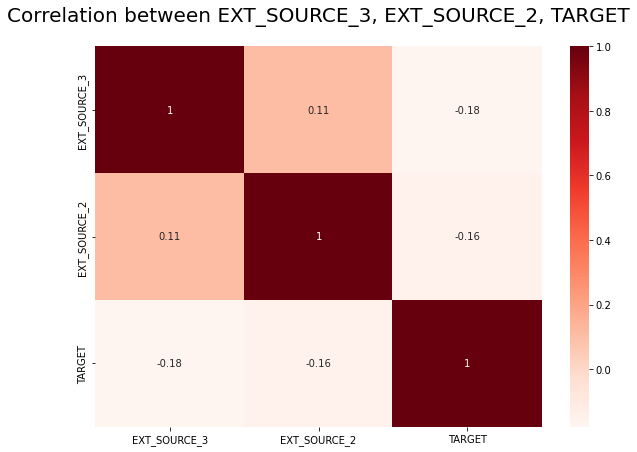

In [231]:
plt.figure(figsize= [10,7])

sns.heatmap(appl_data[irrev+["TARGET"]].corr(), cmap="Reds",annot=True)

plt.title("Correlation between EXT_SOURCE_3, EXT_SOURCE_2, TARGET", fontdict={"fontsize":20}, pad=25)
plt.show()

* **There seems to be no linear correlation and also from columns description we decided to remove these columns.**
* **Also we are aware correation doesn't cause causation**

In [232]:
#dropping above columns as decided

appl_data.drop(irrev, axis=1, inplace= True)

In [233]:
appl_data.shape  # Now we are left with 71 columns

(307511, 71)

In [234]:
null_values(appl_data).head(10)

OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
dtype: float64

### 2.2.2 Now we will check columns with FLAGS and their relation with TARGET columns to remove irrelevant ones


**For this we will create a dataframe containig all FLAG columns and then plot bar graphs for each column with respect to TARGET column for which "0" will represent as Repayer and "1" will represent as Defaulter**

In [235]:
# creating flag_df dataframe having all FLAG columns and TARGET column

flag_df = appl_data[flag_columns+["TARGET"]]

# replacing "0" as repayer and "1" as defaulter for TARGET column

flag_df["TARGET"] = flag_df["TARGET"].replace({1:"Defaulter", 0:"Repayer"})

# as stated in columnn description replacing "1" as Y being TRUE and "0" as N being False

for i in flag_df:
    if i!= "TARGET":
        flag_df[i] = flag_df[i].replace({1:"Y", 0:"N"})

        
# adding all flags coloumns in variable "flag_columns"

flag_columns = [col for col in appl_data.columns if "FLAG" in col]

flag_columns  # Viewing all FLAG columns

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [236]:
flag_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,Y,Y,N,Y,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Defaulter
1,N,N,Y,Y,N,Y,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
2,Y,Y,Y,Y,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
3,N,Y,Y,Y,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
4,N,Y,Y,Y,N,Y,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer


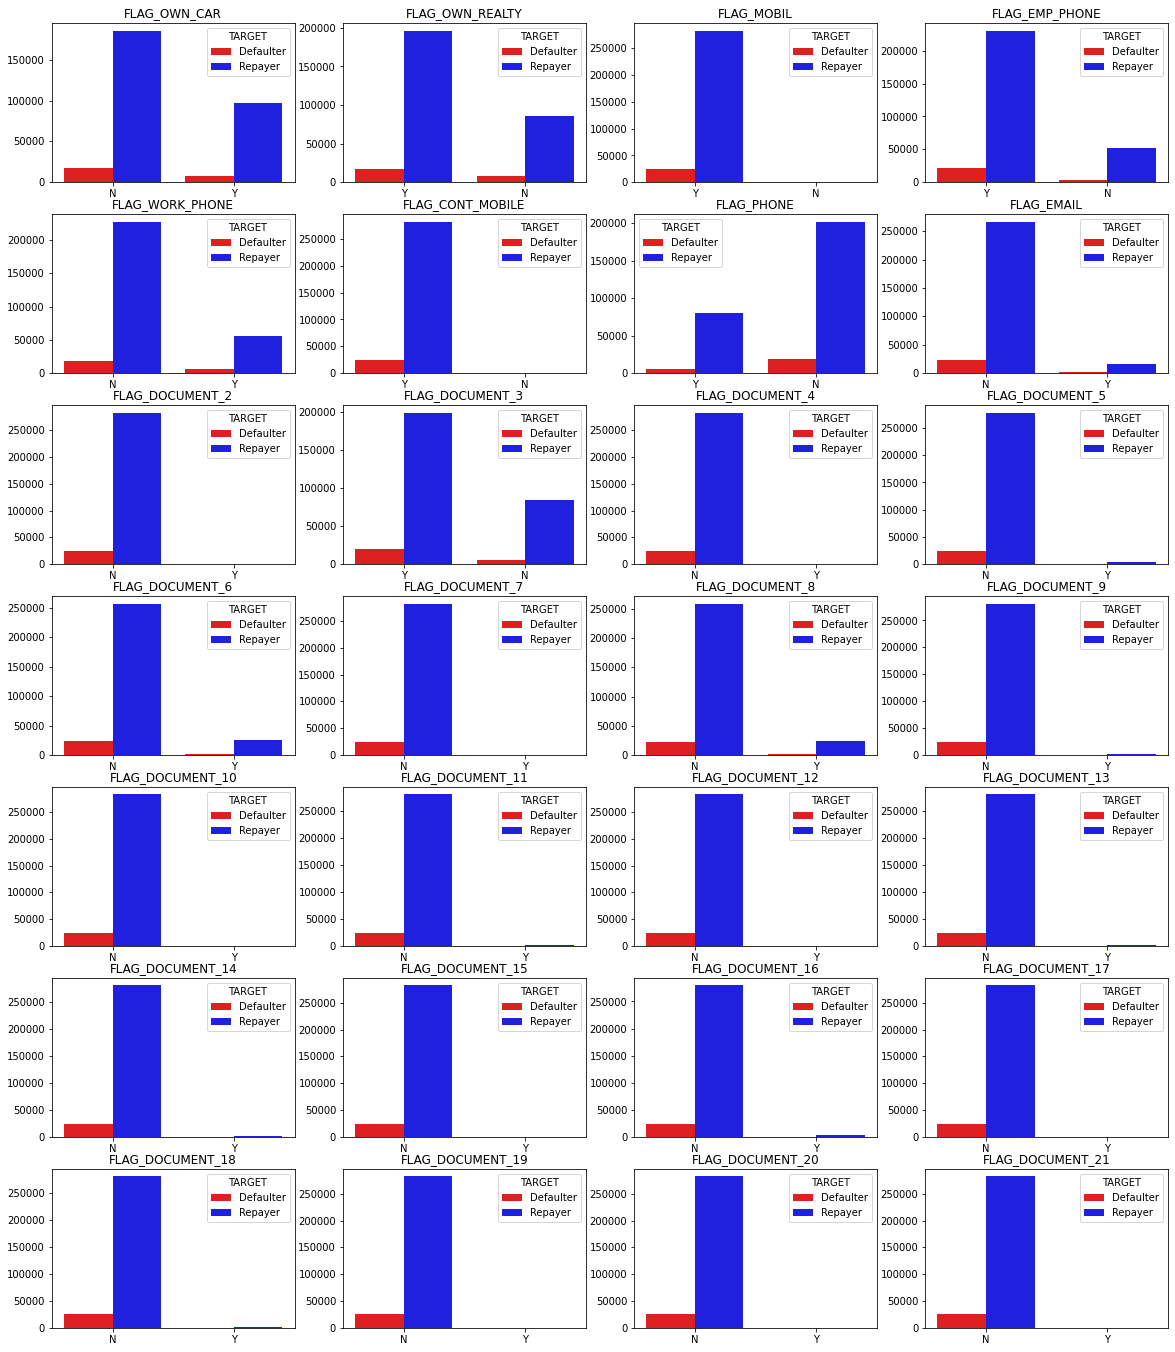

In [237]:
import itertools # using itertools for efficient looping plotting subplots

# Plotting all the graph to find the relation and evaluting for dropping such columns

plt.figure(figsize = [20,24])

for i,j in itertools.zip_longest(flag_columns,range(len(flag_columns))):
    plt.subplot(7,4,j+1)
    ax = sns.countplot(flag_df[i], hue = flag_df["TARGET"], palette = ["r","b"])
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

**INSIGHT**

* **Columns (FLAG_OWN_REALTY, FLAG_MOBIL ,FLAG_EMP_PHONE, FLAG_CONT_MOBILE, FLAG_DOCUMENT_3) have more repayers than defaulter and from these keeping FLAG_DOCUMENT_3,FLAG_OWN_REALTY, FLAG_MOBIL more sense  thus we can include these columns and remove all other FLAG columns for furhter analysis.**


In [238]:
# removing required columns from "flag_df" such that we can remove the irrelevent columns from "appl_data" dataset.

flag_df.drop(["TARGET","FLAG_OWN_REALTY","FLAG_MOBIL","FLAG_DOCUMENT_3"], axis=1 , inplace = True)

In [239]:
len(flag_df.columns)

29

In [241]:
# dropping the columns of "flag_df" dataframe that is removing more 25 columns from "appl_data" dataframe

appl_data.drop(flag_df.columns, axis=1, inplace= True)
appl_data.shape

(307511, 42)

In [242]:
appl_data.shape    # Now we are left 46 revelent columns

(307511, 42)

**INSIGHT**

* **After removing uneccsarry, irrelevent and missing columns. We are left with 46 columns**

## 3. Imputing values

**Now that we have removed all the unneccesarry columns, we will proced with imputing values for relevent missing columns whereever required**

In [243]:
null_values(appl_data).head(10)

OCCUPATION_TYPE               31.35
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
NAME_TYPE_SUITE                0.42
OBS_60_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
dtype: float64

**Insight**
* **Now we have only 7 columns which have missing values more than 1%. Thus, we will only impute them for further analysis and such columns are: OCCUPATION_TYPE, AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_HOUR**

###  3.1 Imputing for "OCCUPATION_TYPE" column

In [40]:
#Percentage of each category present in "OCCUPATION_TYPE"

appl_data["OCCUPATION_TYPE"].value_counts(normalize=True)*100

Laborers                 26.198098
Sales staff              15.042037
Core staff               13.059181
Managers                 10.125350
Drivers                   8.776867
High skill tech staff     5.354065
Accountants               4.712656
Medicine staff            4.118151
Security staff            3.223461
Cooking staff             2.861130
Cleaning staff            2.171644
Private service staff     1.246468
Low-skill Laborers        0.997878
Waiters/barmen staff      0.623820
Secretaries               0.617957
Realty agents             0.363504
HR staff                  0.268524
IT staff                  0.239209
Name: OCCUPATION_TYPE, dtype: float64

**Insight:**
* **from above it looks like this columnn is categorical one and have missing values of 31.35%. to fix this we will impute another category as "Unknown" for the missing values.**

In [41]:
# imputing null values with "Unknown"

appl_data["OCCUPATION_TYPE"] = appl_data["OCCUPATION_TYPE"].fillna("Unknown") 

In [42]:
appl_data["OCCUPATION_TYPE"].isnull().sum() # Now we have zero null values 

0

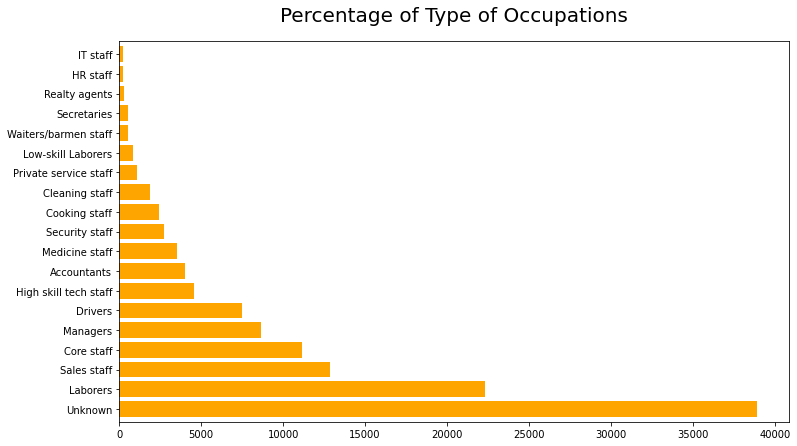

In [43]:
# Plotting a percentage graph having each category of "OCCUPATION_TYPE"

plt.figure(figsize = [12,7])
(appl_data["OCCUPATION_TYPE"].value_counts()).plot.barh(color= "orange",width = .8)
plt.title("Percentage of Type of Occupations", fontdict={"fontsize":20}, pad =20)
plt.show()

* **Highest percentage of values belongs to Unknown group and Secons belongs to Laborers**

### 3.2 Now let's move to other 6 columns : 

**AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"**

In [44]:
appl_data[["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]].describe()

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR
count,107511.000000,107511.000000,107511.000000,107511.000000,107511.000000,107511.000000
mean,1.892969,0.264698,0.267498,0.033494,0.006957,0.006557
std,1.871729,0.611574,0.920079,0.201759,0.106735,0.085633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,8.000000,24.000000,8.000000,9.000000,3.000000


**These above columns represent number of enquries made for the customer(which should be discrete and not continous).
from above describe results we see that all values are numerical and can conclude that for imputing missing we should not use mean as it is in decimal form, hence for imputing purpose we will use median for all these columns.**

In [45]:
#creating "amt_credit" variable having these columns "AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
#"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"

amt_credit = ["AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"]

In [46]:
#filling missing values with median values

appl_data.fillna(appl_data[amt_credit].median(),inplace = True)

In [47]:
null_values(appl_data).head(10)

NAME_TYPE_SUITE                0.41
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
AMT_GOODS_PRICE                0.08
AMT_ANNUITY                    0.01
DAYS_LAST_PHONE_CHANGE         0.00
LIVE_CITY_NOT_WORK_CITY        0.00
REGION_RATING_CLIENT_W_CITY    0.00
dtype: float64

**Still there some missing value coloumns but we will not impute them as the missing value count very less.**

## 4. Standardising values 

In [48]:
appl_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,124203.000000,124203.000000,124203.000000,1.242030e+05,1.242030e+05,124195.000000,1.241040e+05,124203.000000,124203.000000,124203.000000,124203.000000,124203.000000,124203.000000,124202.000000,124202.000000,124202.000000,124202.000000,124202.000000,124202.000000,124202.000000,124202.000000,124202.000000,124202.000000,123789.000000,123789.000000,123789.000000,123789.000000,124201.000000,124202.000000,124203.000000,124203.000000,124203.000000,124203.000000,124203.000000,124203.000000
mean,172042.005032,0.081480,0.418589,1.692171e+05,5.989115e+05,27088.336817,5.383279e+05,0.020848,-16029.582385,63595.579422,-4982.852967,-2993.929615,0.999992,2.156125,2.053655,2.032753,12.059001,0.015048,0.050402,0.039999,0.078493,0.230463,0.178814,1.421524,0.142638,1.404697,0.099104,-962.870710,0.712291,0.005676,0.006022,0.028993,0.231548,0.229125,1.772960
std,41583.242571,0.273571,0.721459,3.471373e+05,4.026969e+05,14543.852496,3.700742e+05,0.013808,4367.731325,141088.143697,3522.826458,1510.320169,0.002837,0.910163,0.509777,0.503182,3.261925,0.121745,0.218773,0.195958,0.268947,0.421131,0.383198,2.316178,0.440634,2.296261,0.357311,826.953925,0.452696,0.079703,0.099333,0.188060,0.860871,0.576114,1.767852
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000533,-25201.000000,-17531.000000,-22392.000000,-6337.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4153.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136042.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16479.000000,2.385000e+05,0.010006,-19676.000000,-2754.000000,-7472.000000,-4298.000000,1.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1571.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,172020.000000,0.000000,0.000000,1.440000e+05,5.130000e+05,24876.000000,4.500000e+05,0.018850,-15736.000000,-1213.000000,-4490.000000,-3256.000000,1.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-756.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,208168.000000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12396.000000,-289.000000,-2009.000000,-1716.000000,1.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,-273.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,244031.000000,1.000000,12.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7676.000000,365243.000000,0.000000,0.000000,1.000000,14.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,6.000000,47.000000,5.000000,0.000000,1.000000,3.000000,9.000000,8.000000,24.000000,8.000000,25.000000


**Insights:**

**from above describe result we can see that** 
* **columns AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE have very high values, thus will make these numerical columns in categorical columns for better understanding.**
* **columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE which counts days have negative values. thus will correct those values**
* **convert DAYS_BIRTH to AGE in years , DAYS_EMPLOYED to YEARS EMPLOYED**

### 4.1 Taking care of columns: AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE

In [49]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount in term of Lakhs
appl_data['AMT_INCOME_TOTAL']=appl_data['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

appl_data['AMT_INCOME_RANGE']=pd.cut(appl_data['AMT_INCOME_TOTAL'],bins,labels=slot)

In [50]:
round((appl_data["AMT_INCOME_RANGE"].value_counts(normalize = True)*100),2)

1L-2L        50.80
2L-3L        21.06
0-1L         20.79
3L-4L         4.82
4L-5L         1.72
5L-6L         0.35
6L-7L         0.29
8L-9L         0.11
7L-8L         0.05
9L-10L        0.01
10L Above     0.01
Name: AMT_INCOME_RANGE, dtype: float64

In [51]:
# Creating bins for Credit amount in term of Lakhs
appl_data['AMT_CREDIT']=appl_data['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

appl_data['AMT_CREDIT_RANGE']=pd.cut(appl_data['AMT_CREDIT'],bins=bins,labels=slots)

In [52]:
round((appl_data["AMT_CREDIT_RANGE"].value_counts(normalize = True)*100),2)

2L-3L        17.81
10L Above    16.24
5L-6L        11.05
4L-5L        10.42
1L-2L         9.90
3L-4L         8.50
6L-7L         7.87
8L-9L         7.12
7L-8L         6.22
9L-10L        2.91
0-1L          1.96
Name: AMT_CREDIT_RANGE, dtype: float64

In [53]:
# Creating bins for Price of Goods in term of Lakhs
appl_data['AMT_GOODS_PRICE']=appl_data['AMT_GOODS_PRICE']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']

appl_data['AMT_GOODS_PRICE_RANGE']=pd.cut(appl_data['AMT_GOODS_PRICE'],bins=bins,labels=slots)

In [54]:
round((appl_data["AMT_GOODS_PRICE_RANGE"].value_counts(normalize = True)*100),2)

2L-3L        20.38
4L-5L        18.45
6L-7L        13.03
10L Above    11.11
1L-2L        10.88
8L-9L         7.01
3L-4L         6.90
5L-6L         4.23
0-1L          2.83
7L-8L         2.68
9L-10L        2.51
Name: AMT_GOODS_PRICE_RANGE, dtype: float64

### 4.2 Dealing with columns :

**DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, DAYS_LAST_PHONE_CHANGE**

In [55]:
# creating "days_col" varibale to store all days columns
days_col = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]

appl_data[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,124203.000000,124203.000000,124203.000000,124203.000000,124201.000000
mean,-16029.582385,63595.579422,-4982.852967,-2993.929615,-962.870710
std,4367.731325,141088.143697,3522.826458,1510.320169,826.953925
min,-25201.000000,-17531.000000,-22392.000000,-6337.000000,-4153.000000
25%,-19676.000000,-2754.000000,-7472.000000,-4298.000000,-1571.000000
50%,-15736.000000,-1213.000000,-4490.000000,-3256.000000,-756.000000
75%,-12396.000000,-289.000000,-2009.000000,-1716.000000,-273.000000
max,-7676.000000,365243.000000,0.000000,0.000000,0.000000


* **from describe we get that days are in negative that is not usual, so to correct it we use absolute function as below**

In [56]:
#using abs() function to correct the days values

appl_data[days_col]= abs(appl_data[days_col])

In [57]:
# Data is correct now

appl_data[days_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,124203.000000,124203.000000,124203.000000,124203.000000,124201.000000
mean,16029.582385,67500.553038,4982.852967,2993.929615,962.870710
std,4367.731325,139262.102640,3522.826458,1510.320169,826.953925
min,7676.000000,0.000000,0.000000,0.000000,0.000000
25%,12396.000000,929.000000,2009.000000,1716.000000,273.000000
50%,15736.000000,2202.000000,4490.000000,3256.000000,756.000000
75%,19676.000000,5675.500000,7472.000000,4298.000000,1571.000000
max,25201.000000,365243.000000,22392.000000,6337.000000,4153.000000


### 4.3. now convert DAYS_BIRTH, DAYS_EMPLOYED columns in terms of Years and binning years for better understanding, that is adding two more categorical column

In [58]:
appl_data["AGE"] = appl_data["DAYS_BIRTH"]/365
bins = [0,20,25,30,35,40,45,50,55,60,100]
slots = ["0-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60","60 Above"]

appl_data["AGE_GROUP"] = pd.cut(appl_data["AGE"], bins=bins, labels=slots)

In [59]:
appl_data["AGE_GROUP"].value_counts(normalize= True)*100

35-40       14.008518
40-45       13.339452
30-35       12.890188
60 Above    11.551251
45-50       11.399886
50-55       11.356408
55-60       10.785569
25-30       10.691368
20-25        3.977360
0-20         0.000000
Name: AGE_GROUP, dtype: float64

In [60]:
#creating column "EMPLOYEMENT_YEARS" from "DAYS_EMPLOYED"

appl_data["YEARS_EMPLOYED"] = appl_data["DAYS_EMPLOYED"]/365
bins = [0,5,10,15,20,25,30,50]
slots = ["0-5","5-10","10-15","15-20","20-25","25-30","30 Above"]

appl_data["EMPLOYEMENT_YEARS"] = pd.cut(appl_data["YEARS_EMPLOYED"], bins=bins, labels=slots)

In [61]:
appl_data["EMPLOYEMENT_YEARS"].value_counts(normalize= True)*100

0-5         54.233596
5-10        25.652775
10-15       10.806488
15-20        4.293943
20-25        2.511015
25-30        1.308985
30 Above     1.193198
Name: EMPLOYEMENT_YEARS, dtype: float64

## 5. Identifying Outliers

In [62]:
appl_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED
count,124203.000000,124203.000000,124203.000000,124203.000000,124203.000000,124195.000000,124104.000000,124203.000000,124203.000000,124203.000000,124203.000000,124203.000000,124203.000000,124202.000000,124202.000000,124202.000000,124202.000000,124202.000000,124202.000000,124202.000000,124202.000000,124202.000000,124202.000000,123789.000000,123789.000000,123789.000000,123789.000000,124201.000000,124202.000000,124203.000000,124203.000000,124203.000000,124203.000000,124203.000000,124203.000000,124203.000000,124203.000000
mean,172042.005032,0.081480,0.418589,1.692171,5.989115,27088.336817,5.383279,0.020848,16029.582385,67500.553038,4982.852967,2993.929615,0.999992,2.156125,2.053655,2.032753,12.059001,0.015048,0.050402,0.039999,0.078493,0.230463,0.178814,1.421524,0.142638,1.404697,0.099104,962.870710,0.712291,0.005676,0.006022,0.028993,0.231548,0.229125,1.772960,43.916664,184.933022
std,41583.242571,0.273571,0.721459,3.471373,4.026969,14543.852496,3.700742,0.013808,4367.731325,139262.102640,3522.826458,1510.320169,0.002837,0.910163,0.509777,0.503182,3.261925,0.121745,0.218773,0.195958,0.268947,0.421131,0.383198,2.316178,0.440634,2.296261,0.357311,826.953925,0.452696,0.079703,0.099333,0.188060,0.860871,0.576114,1.767852,11.966387,381.540007
min,100002.000000,0.000000,0.000000,0.256500,0.450000,1980.000000,0.450000,0.000533,7676.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.030137,0.000000
25%,136042.500000,0.000000,0.000000,1.125000,2.700000,16479.000000,2.385000,0.010006,12396.000000,929.000000,2009.000000,1716.000000,1.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,273.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,33.961644,2.545205
50%,172020.000000,0.000000,0.000000,1.440000,5.130000,24876.000000,4.500000,0.018850,15736.000000,2202.000000,4490.000000,3256.000000,1.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,756.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.112329,6.032877
75%,208168.000000,0.000000,1.000000,2.025000,8.086500,34596.000000,6.795000,0.028663,19676.000000,5675.500000,7472.000000,4298.000000,1.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1571.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.906849,15.549315
max,244031.000000,1.000000,12.000000,1170.000000,40.500000,258025.500000,40.500000,0.072508,25201.000000,365243.000000,22392.000000,6337.000000,1.000000,14.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,6.000000,47.000000,5.000000,4153.000000,1.000000,3.000000,9.000000,8.000000,24.000000,8.000000,25.000000,69.043836,1000.665753


* **from describe we could find all the columns those wo have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below:**

In [63]:
outlier_col = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
               "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION"]

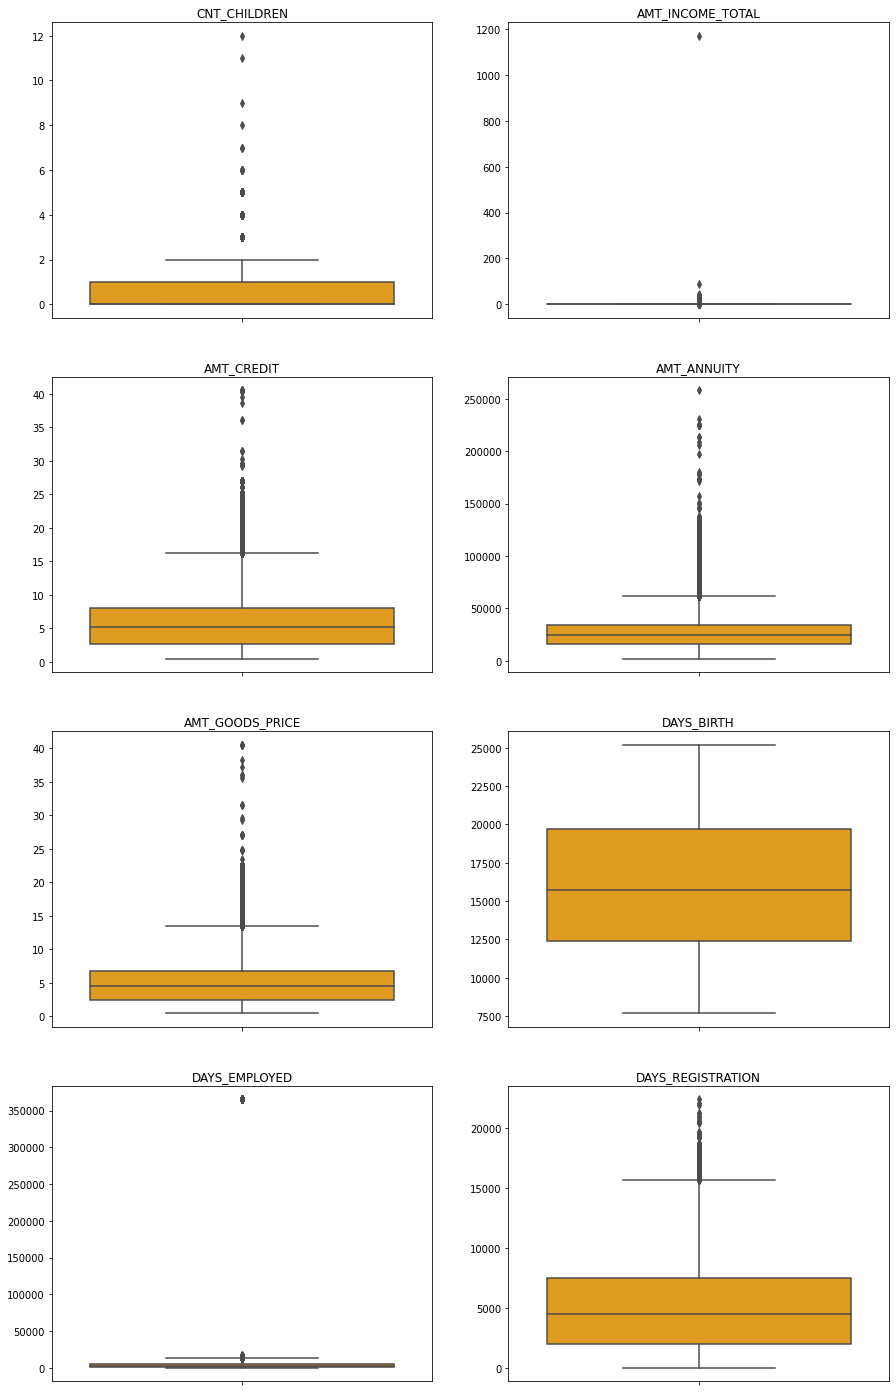

In [64]:
plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(outlier_col, range(len(outlier_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = appl_data[i], orient = "h", color = "orange")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

**Insight:**

**It can be seen that in current application data**
   * **AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.**
   * **AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.**
   * **DAYS_BIRTH has no outliers which means the data available is reliable.**
   * **DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.**

In [65]:
appl_data.nunique().sort_values()

REG_REGION_NOT_WORK_REGION          2
REG_REGION_NOT_LIVE_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_MOBIL                          2
FLAG_OWN_REALTY                     2
NAME_CONTRACT_TYPE                  2
TARGET                              2
FLAG_DOCUMENT_3                     2
CODE_GENDER                         3
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          4
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
DEF_60_CNT_SOCIAL_CIRCLE            6
WEEKDAY_APPR_PROCESS_START          7
EMPLOYEMENT_YEARS                   7
DEF_30_CNT_SOCIAL_CIRCLE            7
NAME_TYPE_SUITE                     7
AMT_REQ_CREDIT_BUREAU_DAY           8
AMT_REQ_CREDIT_BUREAU_WEEK          8
NAME_INCOME_TYPE                    8
AMT_REQ_CRED

In [66]:
#Checking the number of unique values each column possess to identify categorical columns

appl_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124203 entries, 0 to 124202
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   124203 non-null  int64   
 1   TARGET                       124203 non-null  int64   
 2   NAME_CONTRACT_TYPE           124203 non-null  object  
 3   CODE_GENDER                  124203 non-null  object  
 4   FLAG_OWN_REALTY              124203 non-null  object  
 5   CNT_CHILDREN                 124203 non-null  int64   
 6   AMT_INCOME_TOTAL             124203 non-null  float64 
 7   AMT_CREDIT                   124203 non-null  float64 
 8   AMT_ANNUITY                  124195 non-null  float64 
 9   AMT_GOODS_PRICE              124104 non-null  float64 
 10  NAME_TYPE_SUITE              123697 non-null  object  
 11  NAME_INCOME_TYPE             124203 non-null  object  
 12  NAME_EDUCATION_TYPE          124203 non-null

## 6. Converting Desired columns from Object to categorical column

In [67]:
appl_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT

In [68]:
#from the list, we have taken out the desired columns for conversion

categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','CNT_CHILDREN','CNT_FAM_MEMBERS']

for col in categorical_columns:
    appl_data[col] = pd.Categorical(appl_data[col])


In [69]:
len(categorical_columns) # Converting total of 21 columns to categorical one

21

In [70]:
appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124203 entries, 0 to 124202
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   124203 non-null  int64   
 1   TARGET                       124203 non-null  int64   
 2   NAME_CONTRACT_TYPE           124203 non-null  category
 3   CODE_GENDER                  124203 non-null  category
 4   FLAG_OWN_REALTY              124203 non-null  category
 5   CNT_CHILDREN                 124203 non-null  category
 6   AMT_INCOME_TOTAL             124203 non-null  float64 
 7   AMT_CREDIT                   124203 non-null  float64 
 8   AMT_ANNUITY                  124195 non-null  float64 
 9   AMT_GOODS_PRICE              124104 non-null  float64 
 10  NAME_TYPE_SUITE              123697 non-null  category
 11  NAME_INCOME_TYPE             124203 non-null  category
 12  NAME_EDUCATION_TYPE          124203 non-null

**Insight**
* **After imputing we have 53 columns and we will move ahead with Data Analysis on these columns**

# Dataset 2 - "previous_application.csv"

**Note: Have followed similar steps done for application_data.csv**

In [71]:
# importing previous_application.csv

prev_appl = pd.read_csv("previous_application.csv")


In [72]:
prev_appl.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73.0,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1.0,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301.0,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512.0,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781.0,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
#Checking rows and columns of the raw data
prev_appl.shape

(283809, 37)

In [74]:
#Checking information of all the columns like data types
prev_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283809 entries, 0 to 283808
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   283809 non-null  int64  
 1   SK_ID_CURR                   283809 non-null  int64  
 2   NAME_CONTRACT_TYPE           283809 non-null  object 
 3   AMT_ANNUITY                  222035 non-null  float64
 4   AMT_APPLICATION              283809 non-null  float64
 5   AMT_CREDIT                   283809 non-null  float64
 6   AMT_DOWN_PAYMENT             135866 non-null  float64
 7   AMT_GOODS_PRICE              220086 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   283809 non-null  object 
 9   HOUR_APPR_PROCESS_START      283809 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  283809 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       283809 non-null  int64  
 12  RATE_DOWN_PAYMENT            135866 non-null  float64
 13 

* **There are 37 columns having various data types like object, int, float and 1670214 rows.**

In [75]:
# Checking the numeric variables of the dataframes
prev_appl.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,2.838090e+05,283809.000000,222035.000000,2.838090e+05,2.838090e+05,1.358660e+05,2.200860e+05,283809.000000,283809.000000,135866.000000,1021.000000,1021.000000,283808.000000,2.838080e+05,222035.000000,172219.000000,172219.000000,172219.000000,172219.000000,172219.000000,172219.000000
mean,1.920934e+06,278515.556649,15669.312052,1.714585e+05,1.915923e+05,6.660811e+03,2.211475e+05,12.491045,0.996448,0.079737,0.190561,0.778541,-891.422127,3.363179e+02,15.776094,342786.295055,13841.416714,33050.623224,76155.276114,81466.444753,0.326805
std,5.334955e+05,102823.120960,14636.514367,2.869513e+05,3.128305e+05,1.879105e+04,3.085854e+05,3.327280,0.059490,0.107694,0.090228,0.099397,784.625545,1.074590e+04,14.301774,87869.600975,72491.138678,105868.660048,149352.356281,152965.599233,0.469047
min,1.000001e+06,100001.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.059121,0.373150,-2922.000000,-1.000000e+00,0.000000,-2920.000000,-2892.000000,-2801.000000,-2888.000000,-2847.000000,0.000000
25%,1.458397e+06,189524.000000,6209.932500,2.012850e+04,2.485800e+04,0.000000e+00,4.950000e+04,10.000000,1.000000,0.000000,0.160716,0.715645,-1327.000000,-1.000000e+00,6.000000,365243.000000,-1645.000000,-1263.000000,-1334.000000,-1290.000000,0.000000
50%,1.921302e+06,278681.000000,11069.820000,7.060500e+04,7.920000e+04,1.703250e+03,1.079955e+05,12.000000,1.000000,0.053244,0.189136,0.835095,-590.000000,5.000000e+00,12.000000,365243.000000,-833.000000,-368.000000,-542.000000,-502.000000,0.000000
75%,2.382590e+06,367858.000000,20172.600000,1.800000e+05,2.037600e+05,7.735500e+03,2.284166e+05,15.000000,1.000000,0.108909,0.193330,0.852537,-284.000000,9.600000e+01,24.000000,365243.000000,-408.000000,119.000000,-75.000000,-46.000000,1.000000
max,2.845382e+06,456255.000000,417927.645000,3.826372e+06,4.104351e+06,1.575000e+06,3.826372e+06,23.000000,1.000000,0.989740,1.000000,0.867336,-2.000000,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


**Insight**

* **there are 37 columns and 1679214 rows.**
* **there columns having negative, postive values which includes days. fixing is required**

In [76]:
#checking how many null values are present in each of the columns in percentage
null_values(prev_appl)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              52.13
AMT_DOWN_PAYMENT               52.13
NAME_TYPE_SUITE                48.88
NFLAG_INSURED_ON_APPROVAL      39.32
DAYS_FIRST_DRAWING             39.32
DAYS_FIRST_DUE                 39.32
DAYS_LAST_DUE_1ST_VERSION      39.32
DAYS_LAST_DUE                  39.32
DAYS_TERMINATION               39.32
AMT_GOODS_PRICE                22.45
AMT_ANNUITY                    21.77
CNT_PAYMENT                    21.77
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PAYMENT_TYPE               0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
DAYS_DECISION                   0.00
SK_ID_CURR                      0.00
N

In [77]:
#creating a variable p_null_col_50 for storing null columns having missing values more than 50%

p_null_col_50 = null_values(prev_appl)[null_values(prev_appl)>50]

In [78]:
p_null_col_50 # There only 4 columns with missing valus more than 50%

RATE_INTEREST_PRIVILEGED    99.64
RATE_INTEREST_PRIMARY       99.64
RATE_DOWN_PAYMENT           52.13
AMT_DOWN_PAYMENT            52.13
dtype: float64

In [79]:
#dropping null columns having missing values more than 50%

prev_appl.drop(columns = p_null_col_50.index, inplace = True)

In [80]:
#creating a variable p_null_col_15 for storing null columns having missing values more than 15%

p_null_col_15 = null_values(prev_appl)[null_values(prev_appl)>15]

In [81]:
p_null_col_15

NAME_TYPE_SUITE              48.88
DAYS_FIRST_DRAWING           39.32
DAYS_TERMINATION             39.32
DAYS_LAST_DUE                39.32
DAYS_LAST_DUE_1ST_VERSION    39.32
DAYS_FIRST_DUE               39.32
NFLAG_INSURED_ON_APPROVAL    39.32
AMT_GOODS_PRICE              22.45
AMT_ANNUITY                  21.77
CNT_PAYMENT                  21.77
dtype: float64

In [82]:
prev_appl[p_null_col_15.index]

,NAME_TYPE_SUITE,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
0,NaN,365243.0,-37.0,-42.0,300.0,-42.0,0.0,17145.0,1730.430,12.0
1,Unaccompanied,365243.0,365243.0,365243.0,916.0,-134.0,1.0,607500.0,25188.615,36.0
2,"Spouse, partner",365243.0,365243.0,365243.0,59.0,-271.0,1.0,112500.0,15060.735,12.0
3,NaN,365243.0,-177.0,-182.0,-152.0,-482.0,1.0,450000.0,47041.335,12.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,337500.0,31924.395,24.0
...,...,...,...,...,...,...,...,...,...,...
283804,Unaccompanied,NaN,NaN,NaN,NaN,NaN,NaN,244413.0,26544.375,14.0
283805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
prev_appl.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

In [84]:
# Listing down columns which are not needed
Unnecessary_prev = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

prev_appl.drop(Unnecessary_prev,axis =1, inplace = True)

prev_appl.shape

(283809, 29)

In [85]:
# IMputing values "Unknown" as this a categorical column
prev_appl["NAME_TYPE_SUITE"] = prev_appl["NAME_TYPE_SUITE"].fillna("Unknown")

null_values(prev_appl)

NFLAG_INSURED_ON_APPROVAL    39.32
DAYS_TERMINATION             39.32
DAYS_LAST_DUE                39.32
DAYS_LAST_DUE_1ST_VERSION    39.32
DAYS_FIRST_DUE               39.32
DAYS_FIRST_DRAWING           39.32
AMT_GOODS_PRICE              22.45
AMT_ANNUITY                  21.77
CNT_PAYMENT                  21.77
PRODUCT_COMBINATION           0.02
NAME_PRODUCT_TYPE             0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
CHANNEL_TYPE                  0.00
NAME_GOODS_CATEGORY           0.00
NAME_PORTFOLIO                0.00
NAME_CLIENT_TYPE              0.00
CODE_REJECT_REASON            0.00
NAME_PAYMENT_TYPE             0.00
DAYS_DECISION                 0.00
SK_ID_CURR                    0.00
NAME_TYPE_SUITE               0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
AMT_CREDIT                    0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE            0.00
SK_ID_PREV          

* **There are missing values in columns 'DAYS_FIRST_DUE', 'DAYS_TERMINATION', 'DAYS_FIRST_DRAWING','DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE' and these columns count days thus will keeping null values as they are** 

In [86]:
#Analying numerical columns using describe 

prev_appl[p_null_col_15.index].describe()

,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,172219.000000,172219.000000,172219.000000,172219.000000,172219.000000,172219.000000,2.200860e+05,222035.000000,222035.000000
mean,342786.295055,81466.444753,76155.276114,33050.623224,13841.416714,0.326805,2.211475e+05,15669.312052,15.776094
std,87869.600975,152965.599233,149352.356281,105868.660048,72491.138678,0.469047,3.085854e+05,14636.514367,14.301774
min,-2920.000000,-2847.000000,-2888.000000,-2801.000000,-2892.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,365243.000000,-1290.000000,-1334.000000,-1263.000000,-1645.000000,0.000000,4.950000e+04,6209.932500,6.000000
50%,365243.000000,-502.000000,-542.000000,-368.000000,-833.000000,0.000000,1.079955e+05,11069.820000,12.000000
75%,365243.000000,-46.000000,-75.000000,119.000000,-408.000000,1.000000,2.284166e+05,20172.600000,24.000000
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,3.826372e+06,417927.645000,84.000000


In [87]:
# To convert negative days to postive days creating a varaible "p_days_col"

p_days_col = ['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']

prev_appl[p_days_col].describe() # Analysis before conversion


,DAYS_DECISION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,283808.000000,172219.000000,172219.000000,172219.000000,172219.000000,172219.000000
mean,-891.422127,342786.295055,13841.416714,33050.623224,76155.276114,81466.444753
std,784.625545,87869.600975,72491.138678,105868.660048,149352.356281,152965.599233
min,-2922.000000,-2920.000000,-2892.000000,-2801.000000,-2888.000000,-2847.000000
25%,-1327.000000,365243.000000,-1645.000000,-1263.000000,-1334.000000,-1290.000000
50%,-590.000000,365243.000000,-833.000000,-368.000000,-542.000000,-502.000000
75%,-284.000000,365243.000000,-408.000000,119.000000,-75.000000,-46.000000
max,-2.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


In [88]:
# Converting Negative days to positive days

prev_appl[p_days_col] = abs(prev_appl[p_days_col])

prev_appl[p_null_col_15.index].describe() # analysing after conversion

,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,172219.000000,172219.000000,172219.000000,172219.000000,172219.000000,172219.000000,2.200860e+05,222035.000000,222035.000000
mean,342912.534691,82993.537467,77738.853175,34462.678746,15972.866809,0.326805,2.211475e+05,15669.312052,15.776094
std,87375.648219,152142.457749,148534.244195,105417.456315,72051.489647,0.469047,3.085854e+05,14636.514367,14.301774
min,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,365243.000000,448.000000,456.000000,256.000000,473.000000,0.000000,4.950000e+04,6209.932500,6.000000
50%,365243.000000,1183.000000,1167.000000,746.000000,926.000000,0.000000,1.079955e+05,11069.820000,12.000000
75%,365243.000000,2497.000000,2416.000000,1741.000000,1842.000000,1.000000,2.284166e+05,20172.600000,24.000000
max,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,3.826372e+06,417927.645000,84.000000


In [89]:
#days group calculation e.g. 369 will be grouped as with in 2 years

bins = [0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slots = ["1","2","3","4","5","6","7","7 above"]
prev_appl['YEARLY_DECISION'] = pd.cut(prev_appl['DAYS_DECISION'],bins,labels=slots)


In [90]:
prev_appl['YEARLY_DECISION'].value_counts(normalize=True)*100

1          33.925400
2          23.042338
3          12.760035
4           7.883499
5           6.225688
7           5.970938
7 above     5.237696
6           4.954406
Name: YEARLY_DECISION, dtype: float64

**Insight:**
* **Almost 35% loan applicatants have applied for a new loan within 1 year of previous loan decision**

In [91]:
prev_appl.nunique()

SK_ID_PREV                   283809
SK_ID_CURR                   173224
NAME_CONTRACT_TYPE                4
AMT_ANNUITY                  119667
AMT_APPLICATION               39698
AMT_CREDIT                    47291
AMT_GOODS_PRICE               39698
NAME_CASH_LOAN_PURPOSE           25
NAME_CONTRACT_STATUS              5
DAYS_DECISION                  2921
NAME_PAYMENT_TYPE                 4
CODE_REJECT_REASON                9
NAME_TYPE_SUITE                   8
NAME_CLIENT_TYPE                  4
NAME_GOODS_CATEGORY              27
NAME_PORTFOLIO                    5
NAME_PRODUCT_TYPE                 3
CHANNEL_TYPE                      8
SELLERPLACE_AREA               1757
NAME_SELLER_INDUSTRY             11
CNT_PAYMENT                      38
NAME_YIELD_GROUP                  5
PRODUCT_COMBINATION              17
DAYS_FIRST_DRAWING             2349
DAYS_FIRST_DUE                 2892
DAYS_LAST_DUE_1ST_VERSION      2802
DAYS_LAST_DUE                  2835
DAYS_TERMINATION            

In [92]:
null_values(prev_appl)

NFLAG_INSURED_ON_APPROVAL    39.32
DAYS_TERMINATION             39.32
DAYS_LAST_DUE                39.32
DAYS_LAST_DUE_1ST_VERSION    39.32
DAYS_FIRST_DUE               39.32
DAYS_FIRST_DRAWING           39.32
AMT_GOODS_PRICE              22.45
AMT_ANNUITY                  21.77
CNT_PAYMENT                  21.77
PRODUCT_COMBINATION           0.02
NAME_PORTFOLIO                0.00
NAME_PRODUCT_TYPE             0.00
NAME_YIELD_GROUP              0.00
NAME_SELLER_INDUSTRY          0.00
SELLERPLACE_AREA              0.00
CHANNEL_TYPE                  0.00
YEARLY_DECISION               0.00
NAME_GOODS_CATEGORY           0.00
NAME_CLIENT_TYPE              0.00
CODE_REJECT_REASON            0.00
NAME_PAYMENT_TYPE             0.00
DAYS_DECISION                 0.00
SK_ID_CURR                    0.00
NAME_TYPE_SUITE               0.00
NAME_CONTRACT_STATUS          0.00
NAME_CASH_LOAN_PURPOSE        0.00
AMT_CREDIT                    0.00
AMT_APPLICATION               0.00
NAME_CONTRACT_TYPE  

#### Now dealing with continuos variables "AMT_ANNUITY", "AMT_GOODS_PRICE" 
#### To impute null values in continuous variables, we plotted the distribution of the columns and used
* **median if the distribution is skewed**
* **mode if the distribution pattern is preserved.**

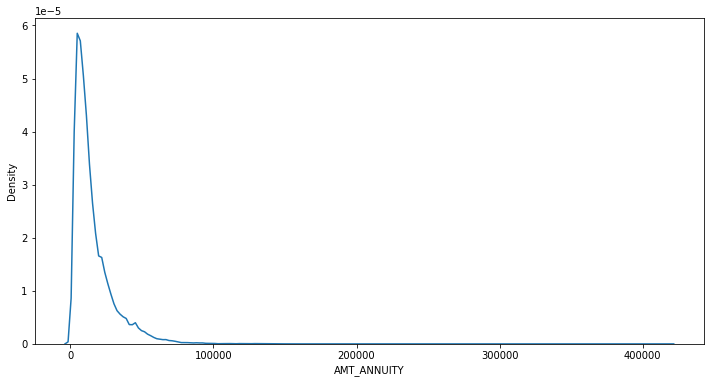

In [93]:
#plotting a kdeplot to understand distribution of "AMT_ANNUITY"

plt.figure(figsize=(12,6))
sns.kdeplot(prev_appl['AMT_ANNUITY'])
plt.show()

**Insight:**
* **There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median.**

In [94]:
#imputing missing values with median 

prev_appl['AMT_ANNUITY'].fillna(prev_appl['AMT_ANNUITY'].median(),inplace = True)

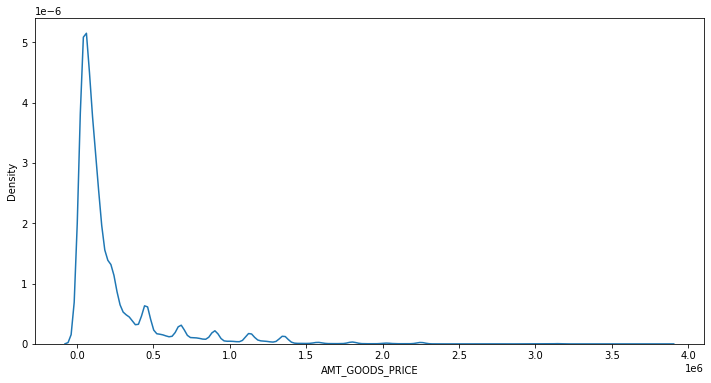

In [95]:
# Plotting kde plot for "AMT_GOODS_PRICE" to understand the distribution

plt.figure(figsize=(12,6))
sns.kdeplot(prev_appl['AMT_GOODS_PRICE'])
plt.show()

* **There are several peaks along the distribution. Let's impute using the mode, mean and median and see if the distribution is still about the same.**

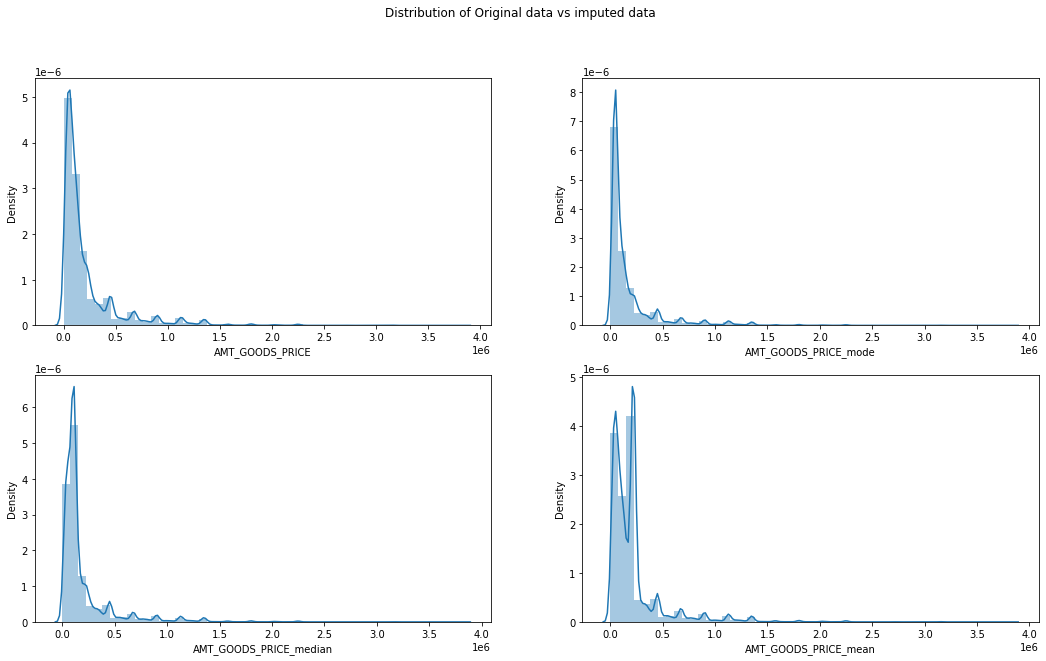

In [96]:
# Creating new dataframe for "AMT_GOODS_PRICE" with columns imputed with mode, median and mean

statsDF = pd.DataFrame() 
statsDF['AMT_GOODS_PRICE_mode'] = prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(prev_appl['AMT_GOODS_PRICE'][pd.notnull(prev_appl['AMT_GOODS_PRICE'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])


* **The original distribution is closer with the distribution of data imputed with mode in this case, thus will impute mode for missing values**

In [97]:
# Imputing null values with mode

prev_appl['AMT_GOODS_PRICE'].fillna(prev_appl['AMT_GOODS_PRICE'].mode()[0], inplace=True)

#### Imputing CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:

In [98]:
#taking out values count for NAME_CONTRACT_STATUS categories where CNT_PAYMENT have null values.

prev_appl.loc[prev_appl['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        50408
Refused          6889
Unused offer     4475
Approved            1
Approv              1
Name: NAME_CONTRACT_STATUS, dtype: int64

In [99]:
#imputing null values as 0

prev_appl['CNT_PAYMENT'].fillna(0,inplace = True)

In [100]:
prev_appl.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'YEARLY_DECISION'], dtype='object')

In [101]:
#Converting required categoical columns from Object to categorical 

p_catgorical_col = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']

for col in p_catgorical_col:
    prev_appl[col] =pd.Categorical(prev_appl[col])


## Finding outliers

In [102]:
prev_appl.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,2.838090e+05,283809.000000,283809.000000,2.838090e+05,2.838090e+05,2.838090e+05,283808.000000,2.838080e+05,283809.000000,172219.000000,172219.000000,172219.000000,172219.000000,172219.000000,172219.000000
mean,1.920934e+06,278515.556649,14668.184456,1.714585e+05,1.915923e+05,1.815975e+05,891.422127,3.363179e+02,12.342262,342912.534691,15972.866809,34462.678746,77738.853175,82993.537467,0.326805
std,5.334955e+05,102823.120960,13084.378227,2.869513e+05,3.128305e+05,2.815078e+05,784.625545,1.074590e+04,14.226790,87375.648219,72051.489647,105417.456315,148534.244195,152142.457749,0.469047
min,1.000001e+06,100001.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.000000,-1.000000e+00,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,1.458397e+06,189524.000000,7356.645000,2.012850e+04,2.485800e+04,4.500000e+04,284.000000,-1.000000e+00,0.000000,365243.000000,473.000000,256.000000,456.000000,448.000000,0.000000
50%,1.921302e+06,278681.000000,11069.820000,7.060500e+04,7.920000e+04,7.060914e+04,590.000000,5.000000e+00,10.000000,365243.000000,926.000000,746.000000,1167.000000,1183.000000,0.000000
75%,2.382590e+06,367858.000000,16486.425000,1.800000e+05,2.037600e+05,1.800000e+05,1327.000000,9.600000e+01,14.000000,365243.000000,1842.000000,1741.000000,2416.000000,2497.000000,1.000000
max,2.845382e+06,456255.000000,417927.645000,3.826372e+06,4.104351e+06,3.826372e+06,2922.000000,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


* **from describe we could find all the columns those wo have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below**

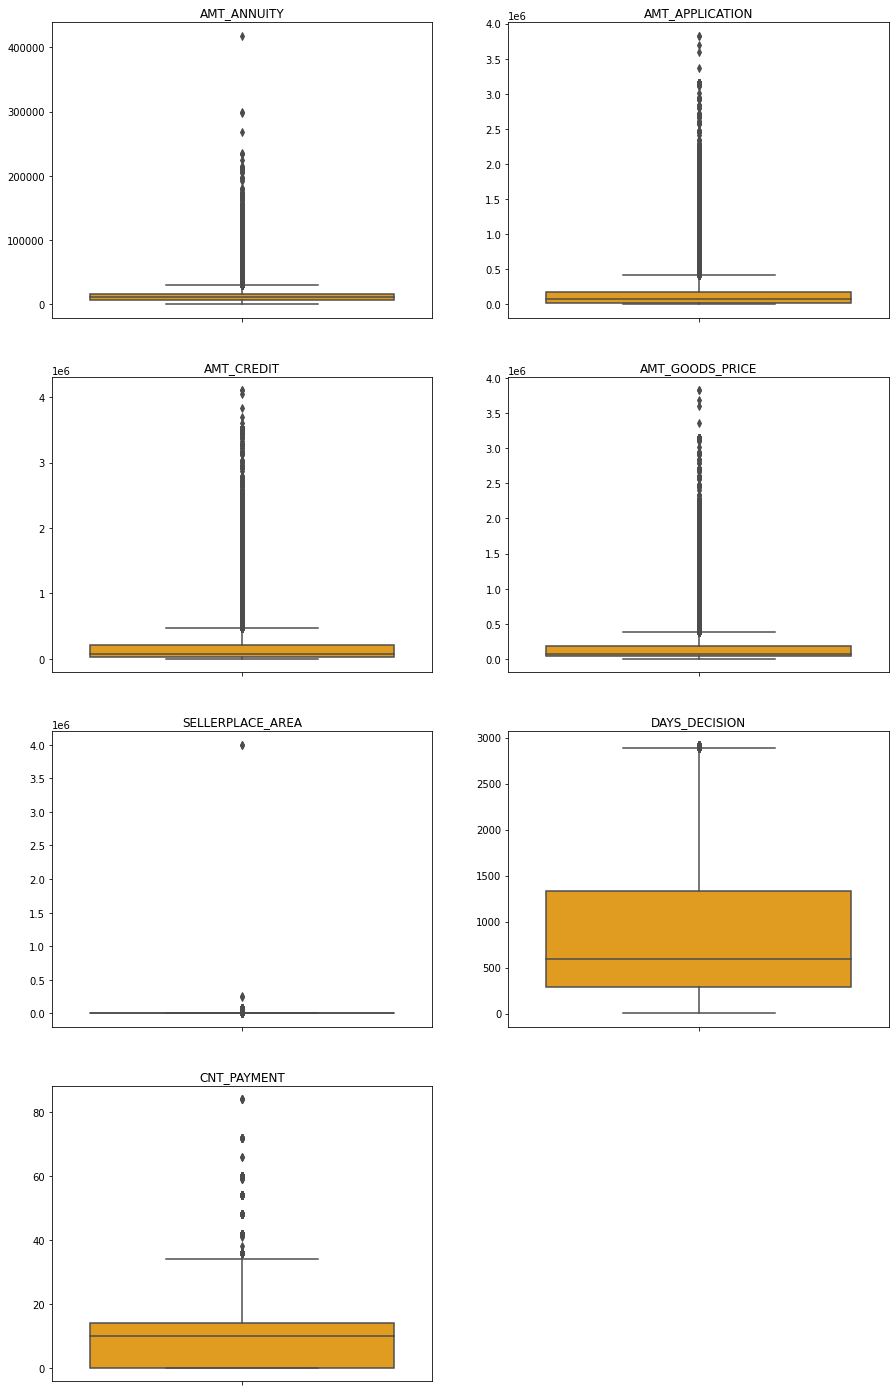

In [103]:
p_outlier_col = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']

plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(p_outlier_col, range(len(p_outlier_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = prev_appl[i], orient = "h", color = "orange")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

**Insight:**

**It can be seen that in previous application data**
* **AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.**
* **CNT_PAYMENT has few outlier values.**
* **DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.**

## 6. Data Analysis Time

Strategy:
The data analysis flow has been planned in following way :

* Imbalance in Data
* Categorical Data Analysis
* Categorical segmented Univariate Analysis
* Categorical Bi/Multivariate analysis
* Numeric Data Analysis
* Bi-furcation of databased based on TARGET data
* Correlation Matrix
* Numerical segmented Univariate Analysis
* Numerical Bi/Multivariate analysis

## 6.1 Imbalance Data

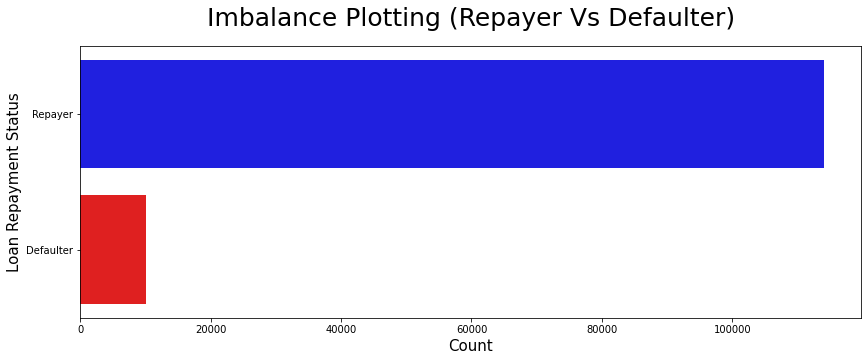

In [104]:
plt.figure(figsize= [14,5])
sns.barplot(y=["Repayer","Defaulter"], x = appl_data["TARGET"].value_counts(), palette = ["blue","r"],orient="h")
plt.ylabel("Loan Repayment Status",fontdict = {"fontsize":15})
plt.xlabel("Count",fontdict = {"fontsize":15})
plt.title("Imbalance Plotting (Repayer Vs Defaulter)", fontdict = {"fontsize":25}, pad = 20)
plt.show()

In [105]:
#Ratio of imbalance percentage with respect to defaulter and repayer is given below 
repayer = round((appl_data["TARGET"].value_counts()[0]/len(appl_data)* 100),2)
print("Repayer Percentage is {}%".format(repayer))
defaluter = round((appl_data["TARGET"].value_counts()[1]/len(appl_data)* 100),2)
print("Defaulter Percentage is {}%".format(defaluter))
print("Imbalance Ratio with respect to Repayer and Defaulter is given: {0:.2f}/1 (approx)".format(repayer/defaluter))

Repayer Percentage is 91.85%
Defaulter Percentage is 8.15%
Imbalance Ratio with respect to Repayer and Defaulter is given: 11.27/1 (approx)


## 6.2 Plotting Functions

### Important Function for Univariate analysis

Creating a function for plotting Variables to do univariate analysis.
This function will create two plots
1. Count plot of given column w.r.t TARGET column
2. Percentage of defaulters within that column

The function is taking 6 arguments
1. dataset : to put the dataset we want to use
2. col : column name for which we need to the analysis
3. target_col : column name for with which we will be comparing
4. ylog : to have y-axis in log10 terms, in case the plot is not readable
5. x_label_angle : to maintain the orientation of x-axis labels
6. h_layout : to give horizontal layout of the subplots

In [106]:
# Creating a function to find if the column is categorical or numerical 

def data_type(dataset,col):
    if dataset[col].dtype == np.int64 or dataset[col].dtype == np.float64:
        return "numerical"
    if dataset[col].dtype == "category":
        return "categorical"
    
# Creating a function "univariate" to perform analysis one single variable with respect to target variable

def univariate(dataset,col,target_col,ylog=False,x_label_angle=False,h_layout=True):
    if data_type(dataset,col) == "numerical":
        sns.distplot(dataset[col],hist=False)
        
        
    elif data_type(dataset,col) == "categorical":
        val_count = dataset[col].value_counts()
        df1 = pd.DataFrame({col: val_count.index,'count': val_count.values})
        
        
        target_1_percentage = dataset[[col, target_col]].groupby([col],as_index=False).mean()
        target_1_percentage[target_col] = target_1_percentage[target_col]*100
        target_1_percentage.sort_values(by=target_col,inplace = True)
        
        
# If the plot is not readable, use the log scale

        if(h_layout):
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,7))
        else:
            fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(25,35))
              
        
# 1. Subplot 1: Count plot of the column
        
        s = sns.countplot(ax=ax1, x=col, data=dataset, hue=target_col)
        ax1.set_title(col, fontsize = 20)
        ax1.legend(['Repayer','Defaulter'])
        ax1.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
        
# 2. Subplot 2: Percentage of defaulters within the column
        
        s = sns.barplot(ax=ax2, x = col, y=target_col, data=target_1_percentage)
        ax2.set_title("Defaulters % in "+col, fontsize = 20)    
        ax2.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        ax2.set_ylabel(target_col,fontdict={'fontsize' : 15, 'fontweight' : 3})
        
        if(x_label_angle):
            s.set_xticklabels(s.get_xticklabels(),rotation=75)
            
            
# If the plot is not readable, use the log scale
                
        if ylog:
            ax1.set_yscale('log')
            ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 15, 'fontweight' : 3})
        else:
            ax1.set_ylabel("Count",fontdict={'fontsize' : 15, 'fontweight' : 3})

        
        plt.show()

In [107]:
# function for plotting repetitive rel plots in bivaritae numerical analysis

def bivariate_n(x,y,df,hue,kind,labels):
    plt.figure(figsize=[15,15])
    sns.relplot(x=x, y=y, data=df, hue=hue,kind=kind,legend = False)
    plt.legend(labels=labels)
    plt.xticks(rotation=45, ha='right')
    plt.show()
    


In [108]:
# function for plotting repetitive barplots in bivariate categorical analysis

def bivariate_c(x,y,df,hue,figsize,labels):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,y=y,data=df, hue=hue)     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontsize = 15)    
    plt.ylabel(y,fontsize = 15)    
    plt.title(col,fontsize = 20) 
    plt.xticks(rotation=45, ha='right')
    plt.legend(labels = labels )
    plt.show()
    

In [109]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_c_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, data=df,hue= hue,palette= palette,order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontsize=15)     
    else:
        plt.ylabel("Count",fontsize=15)       

    plt.title(col , fontsize=20) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=45, ha='right')
    
    plt.show()


In [110]:
# Function to plot point plots 

def pointplot(df,hue,x,y):
    plt.figure(figsize=(12,6))
    sns.pointplot(x=x, y=y, hue=hue, data=df)
    plt.title(x+" VS "+y,fontsize = 15)


In [111]:
# storing numnercial and categorical columns as list in belows varibles

cat_col = list(appl_data.select_dtypes(["category"]).columns)   # Categorical columns list
num_col = list(appl_data.select_dtypes(["int","float"]).columns)  #N Numerical Column list

## 6.3 Categorical Variables Analysis

### 6.3.1 Segmented Univariate Analysis

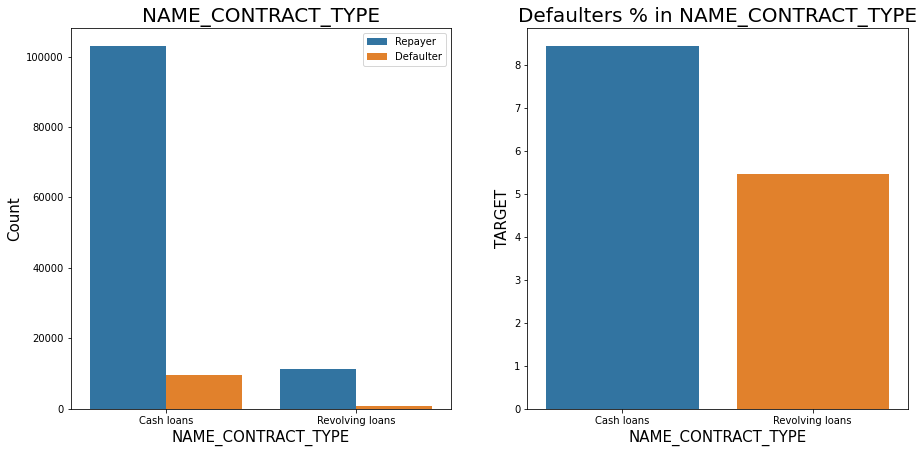

In [112]:
#1 Checking the contract type based on loan repayment status
univariate(appl_data,"NAME_CONTRACT_TYPE","TARGET",False,False,True)

**Inferences: Contract type**
* **Revolving loans are just a small fraction (10%) from the total number of loans**
* **Around 8-9% Cash loan applicants and 5-6% Revolving loan applicant are in defaulters**

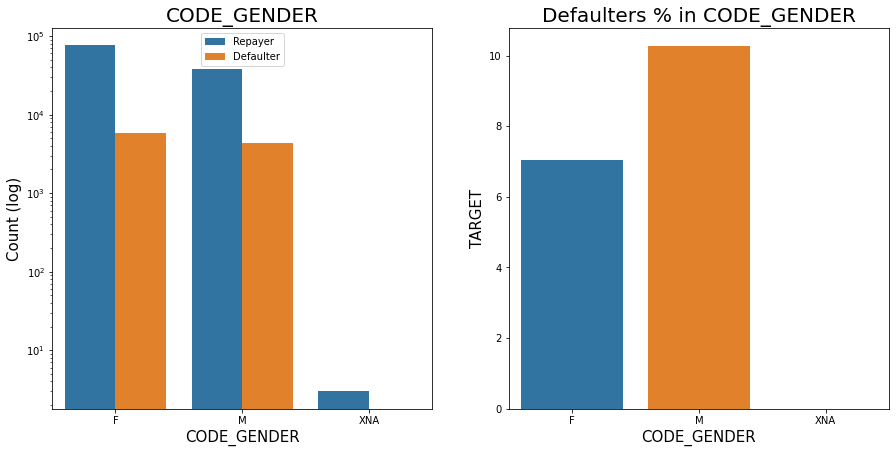

In [113]:
#2 Checking the type of Gender on loan repayment status
univariate(appl_data,"CODE_GENDER","TARGET",True,False,True)

**Inferences: Gender Type**
* **The number of female clients is almost double the number of male clients.**
* **Based on the percentage of defaulted credits, males have a higher chance of not returning their loans about 10%, comparing with women about 7%**

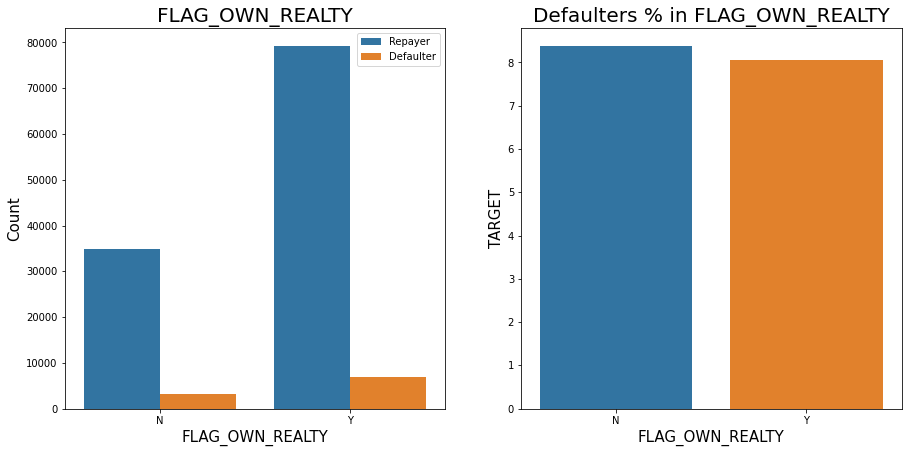

In [114]:
#3 Checking if owning a real estate is related to loan repayment status
univariate(appl_data,"FLAG_OWN_REALTY","TARGET",False,False,True)

**Inferences:**
* **The clients who own real estate are more than double of the ones that don't own.**
* **The defaulting rate of both categories are around the same (~8%). Thus we can infer that there is no correlation between owning a reality and defaulting the loan.**

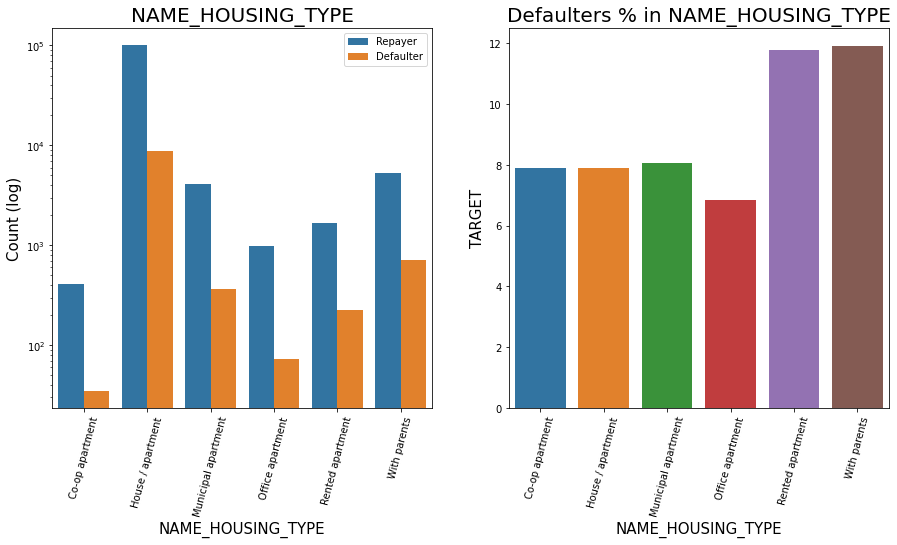

In [115]:
#4 Analyzing Housing Type based on loan repayment status
univariate(appl_data,"NAME_HOUSING_TYPE","TARGET",True,True,True)

**Inferences: Applicant House type**
* **Majority of people live in House/apartment**
* **People living in office apartments have lowest default rate**
* **People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting**

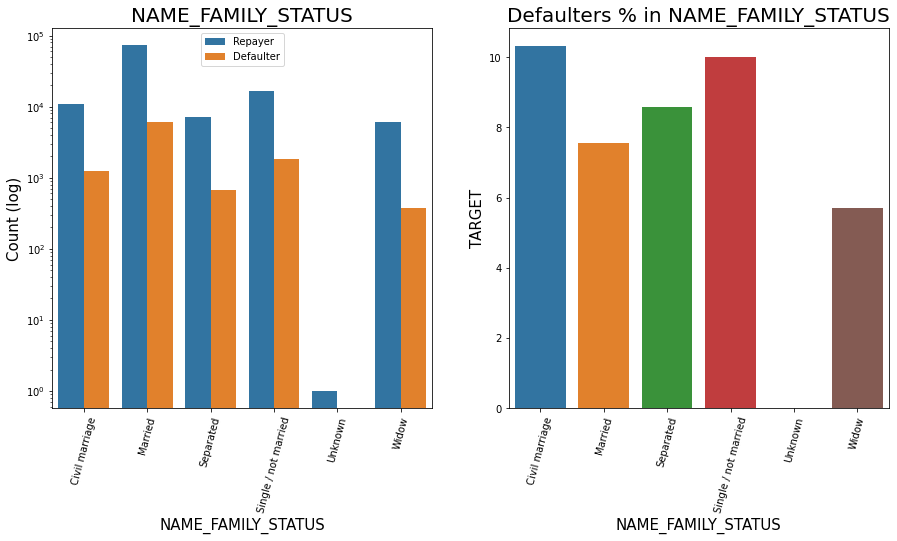

In [116]:
#5 Analyzing Family status based on loan repayment status
univariate(appl_data,"NAME_FAMILY_STATUS","TARGET",True,True,True)

**Inferences:**
* **Most of the people who have taken loan are married, followed by Single/not married and civil marriage**
* **In Percentage of defaulters, Civil marriage has the highest percent around (10%) and widow has the lowest around 6% (exception being Unknown).**

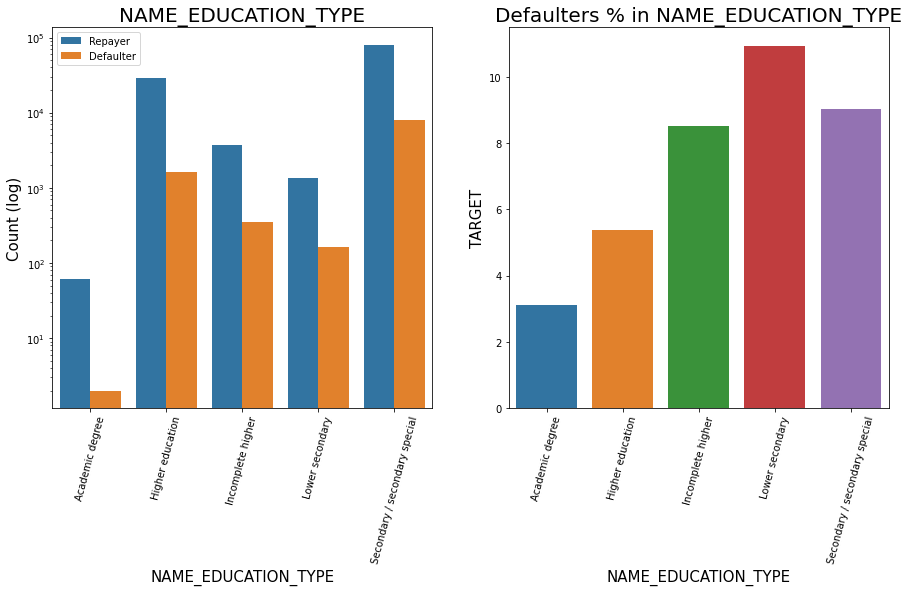

In [117]:
#6 Analyzing Education Type based on loan repayment status
univariate(appl_data,"NAME_EDUCATION_TYPE","TARGET",True,True,True)

**Inferences: Education Type**
* **Majority of clients have Secondary/secondary special education, followed by clients with Higher education.**
* **Very few clients have an academic degree**
* **Lower secondary category have highest rate of defaulting around 11%.**
* **People with Academic degree are least likely to default.**

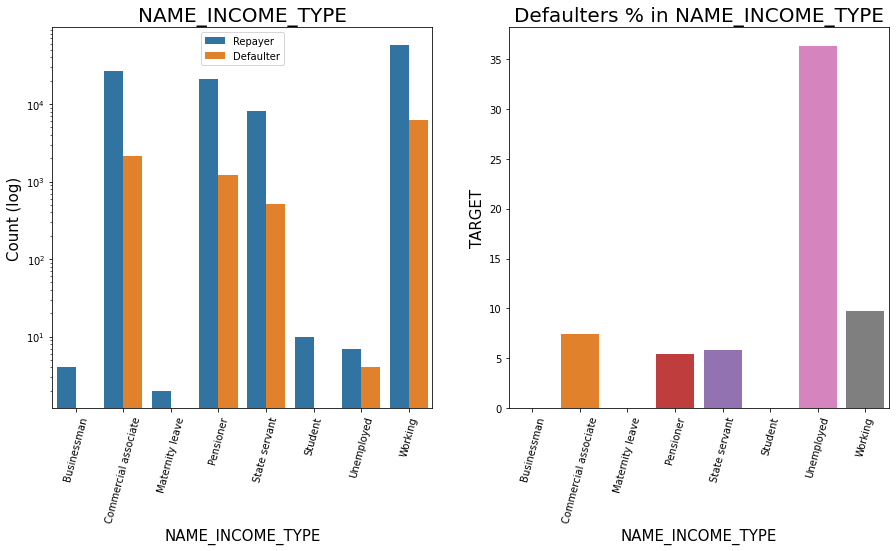

In [118]:
#7 Analyzing Income Type based on loan repayment status
univariate(appl_data,"NAME_INCOME_TYPE","TARGET",True,True,True)

**Inferences:**
* **Most of applicants for loans income type is Working, followed by Commercial associate, Pensioner and State servant.**
* **The applicants who are on Maternity leave have defaulting percentage of 40% which is the highest, followed by Unemployed (37%). The rest under average around 10% defaultees.**
* **Student and Businessmen though less in numbers, do not have default record. Safest two categories for providing loan.**

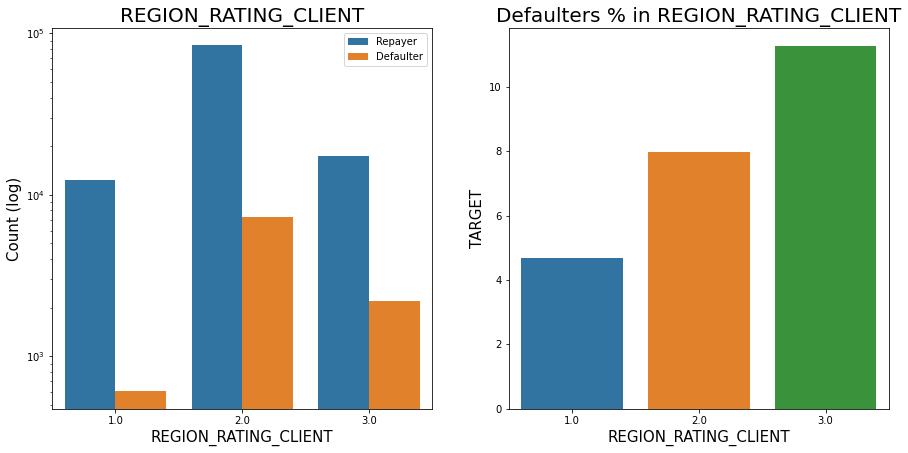

In [119]:
#8 Analyzing Region rating where applicant lives based on loan repayment status
univariate(appl_data,"REGION_RATING_CLIENT","TARGET",True,False,True)

**Inferences:Client Region Rating**
* **Most of the applicants are living in Region with Rating 2 place.**
* **Region Rating 3 has the highest default rate (11%)**
* **Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans**

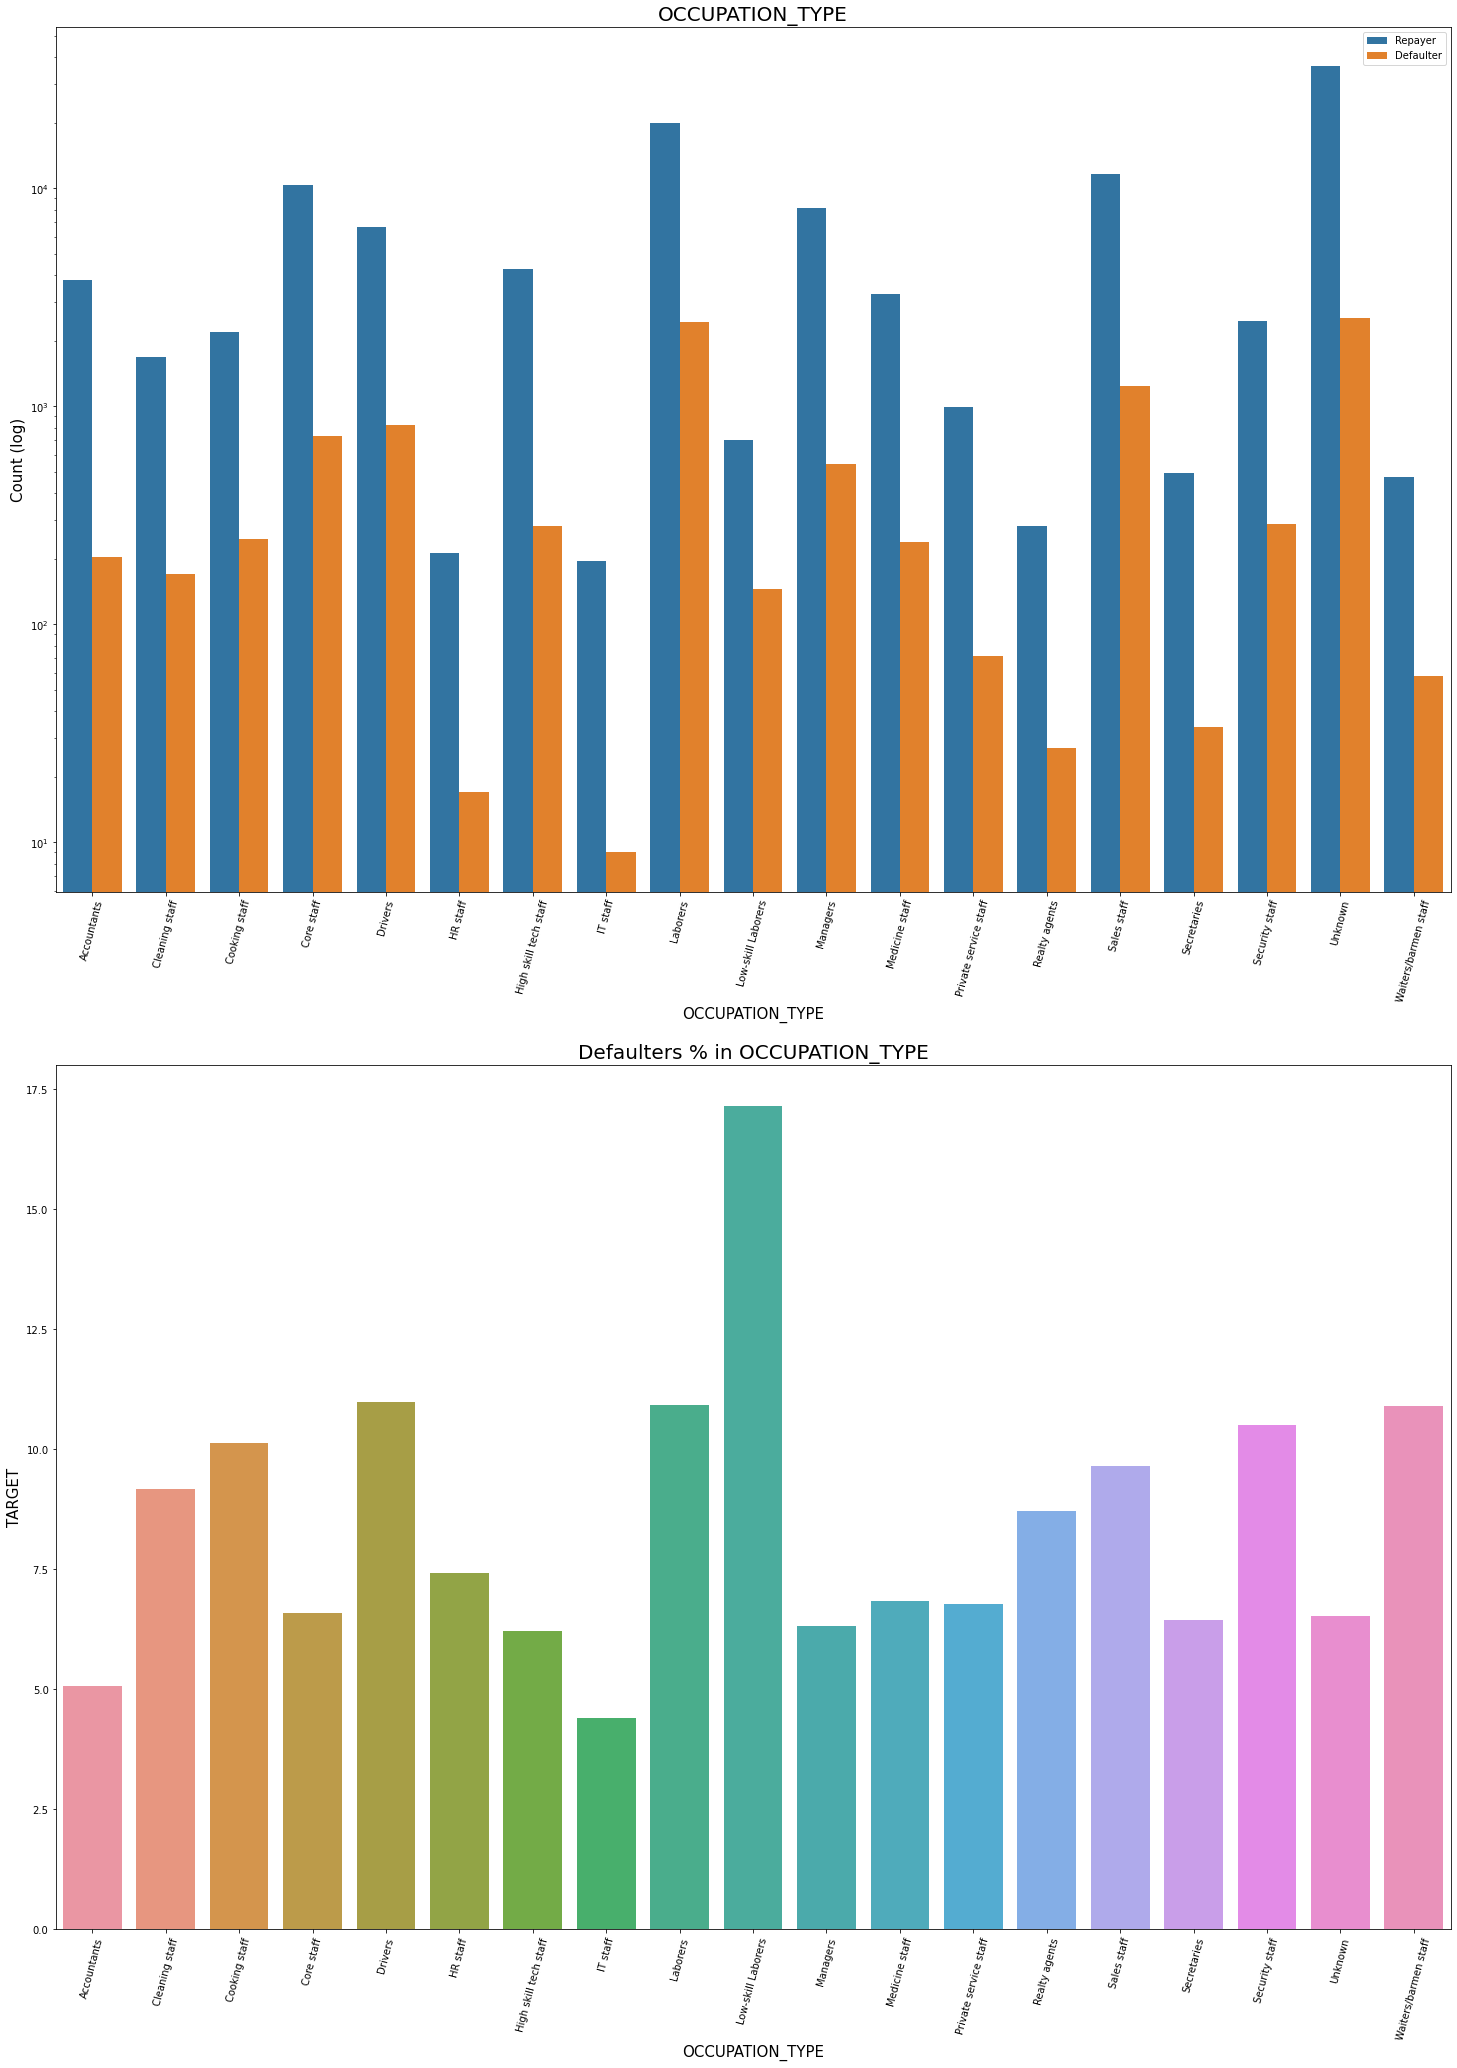

In [120]:
#9 Analyzing Occupation Type where applicant lives based on loan repayment status
univariate(appl_data,"OCCUPATION_TYPE","TARGET",True,True,False)

**Inferences:**
* **Most of the loans are taken by Laborers, followed by Sales staff.**
* **IT staff are less likely to apply for Loan.**
* **Category with highest percent of defautess are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff**

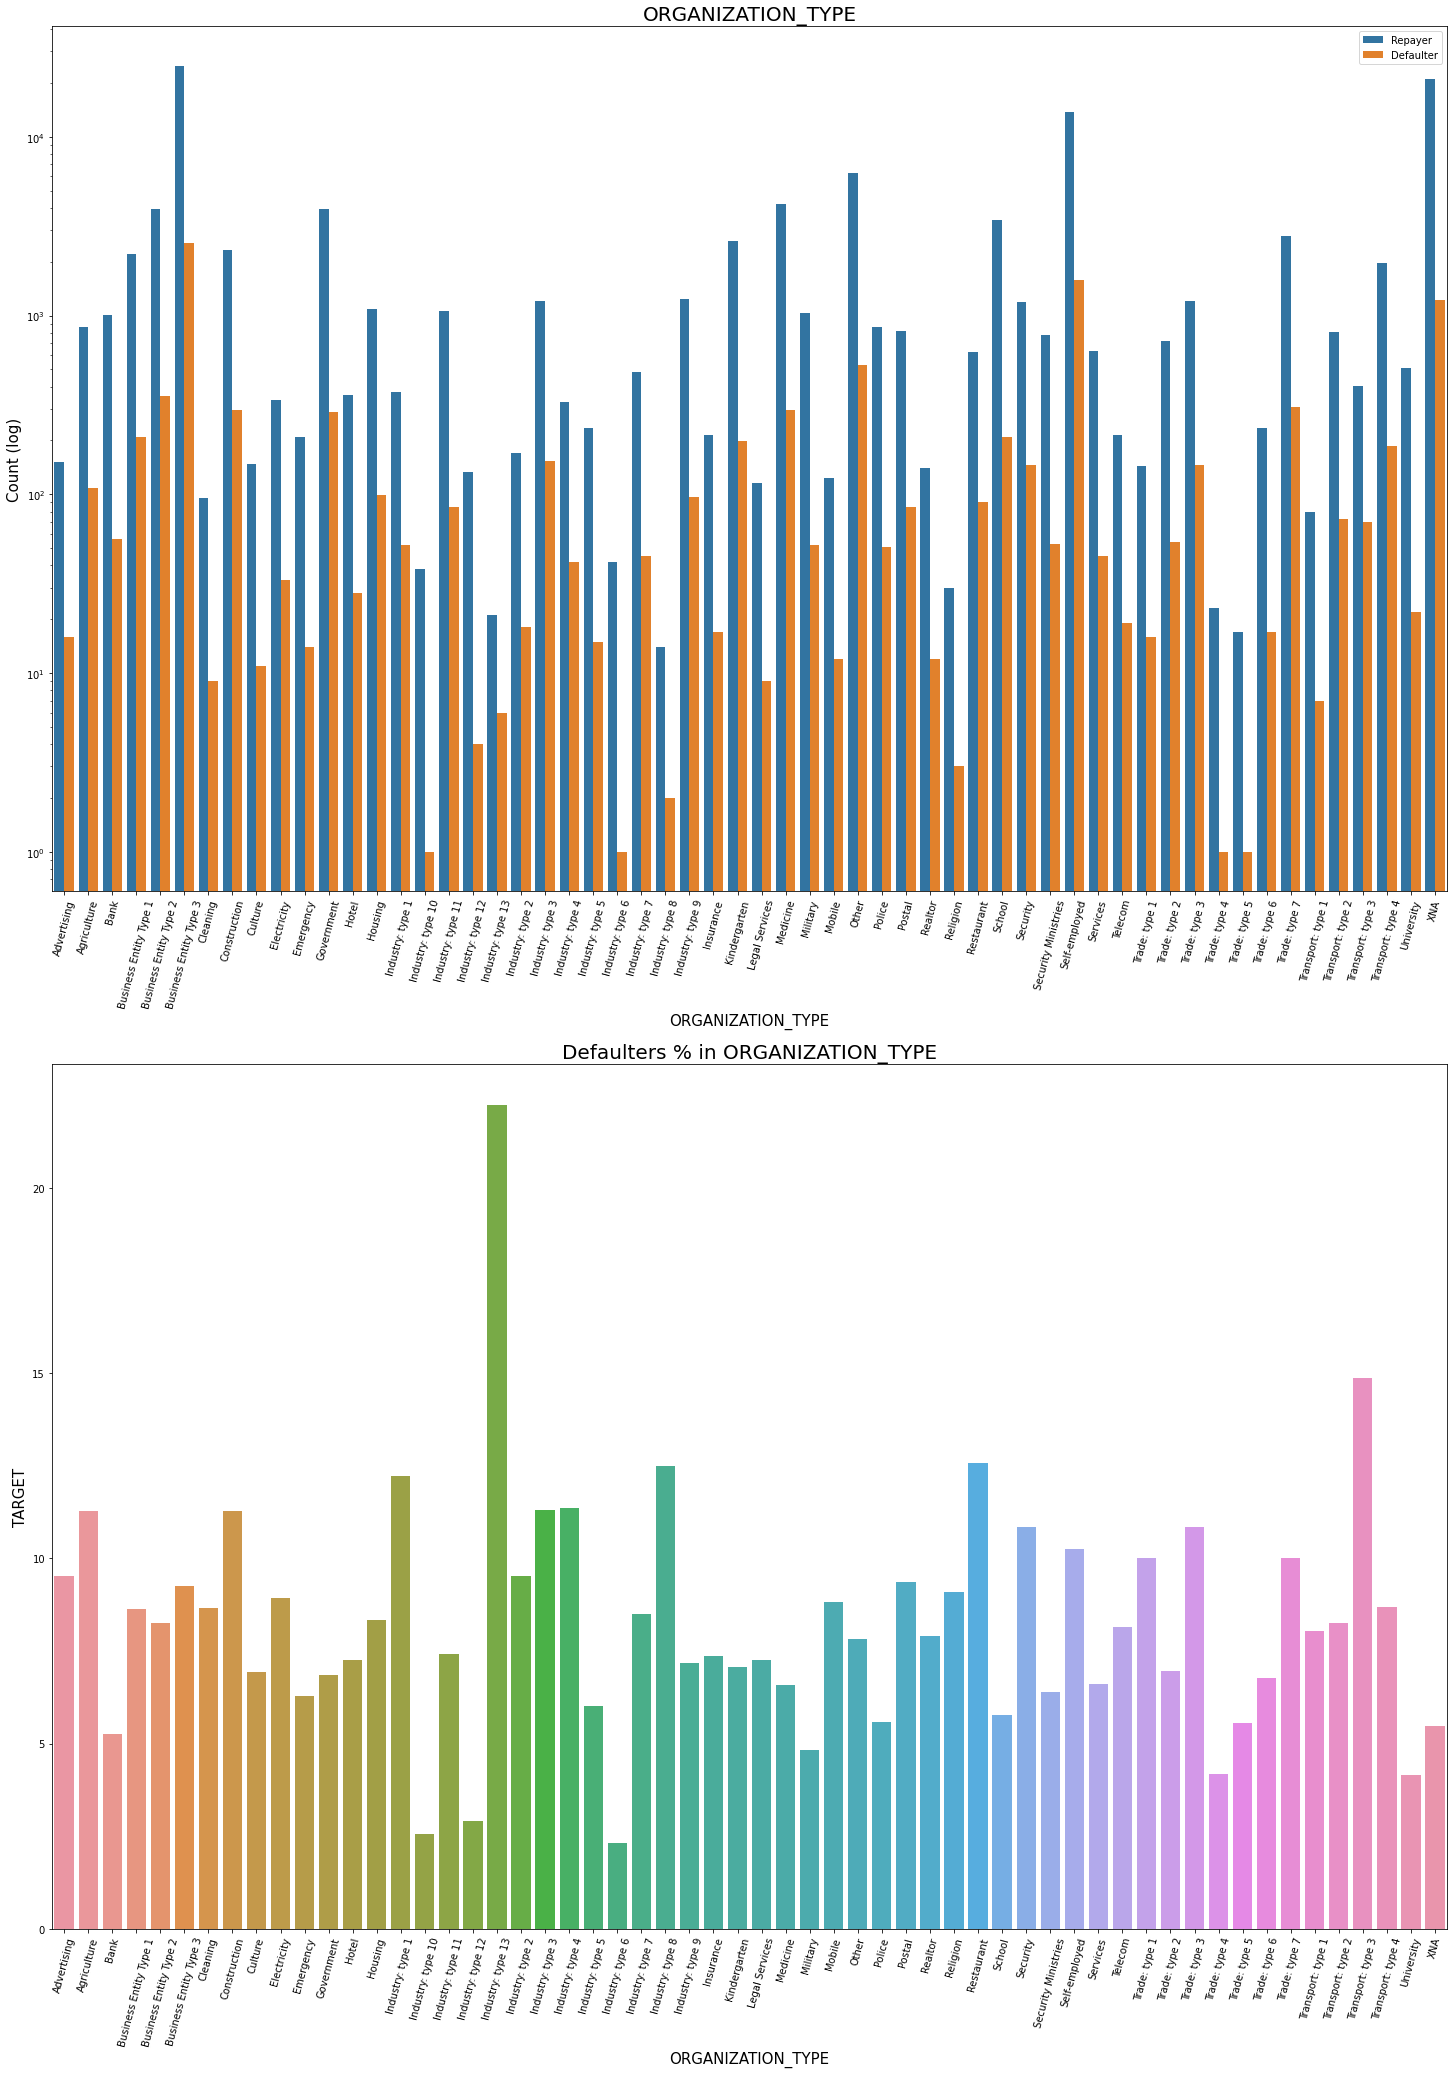

In [121]:
#10 Checking Loan repayment status based on Organization type

univariate(appl_data,"ORGANIZATION_TYPE","TARGET",True,True,False)

**Inferences: Organization Type**
* **Organizations with highest percent of defaultess are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%).**
* **Self employed people have relative high defaulting rate,to be safer side loan disbursement should be avoided or provide loan with higher interest rate to mitigate the risk of defaulting.**
* **Most of the people application for loan are from Business Entity Type 3**
* **For a very high number of applications, Organization type information is unavailable(XNA)**
* **It can be seen that following category of organization type has lesser defaulters thus safer for providing loans: Trade Type 4 and 5, Industry type 8**

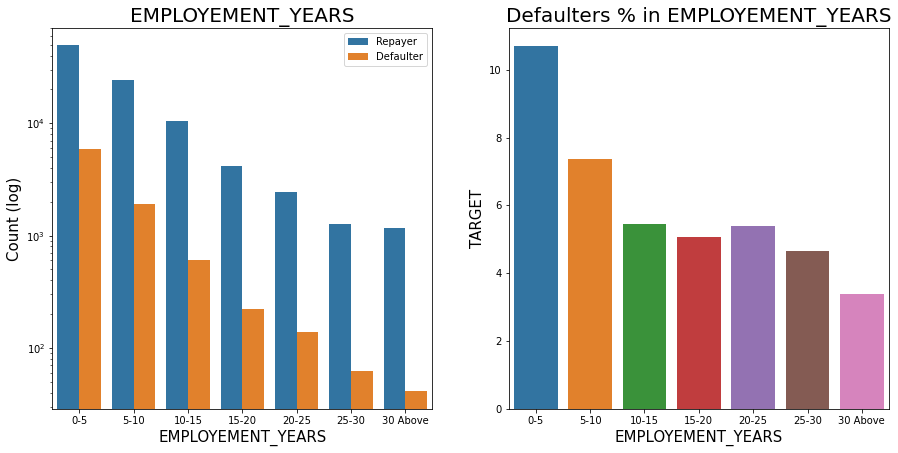

In [122]:
#11 Analyzing Employment_Year based on loan repayment status
univariate(appl_data,"EMPLOYEMENT_YEARS","TARGET",True,False,True)

**Inferences: Employment in Years**
* **Majority of the applicants having working experience between 0-5 years are defaultees. The defaulting rating of this group is also the highest which is around 10%**
* **With increase of employment year, defaulting rate is radually decreasing.**
* **with people having 40+ year experience have less than 1% default rate**

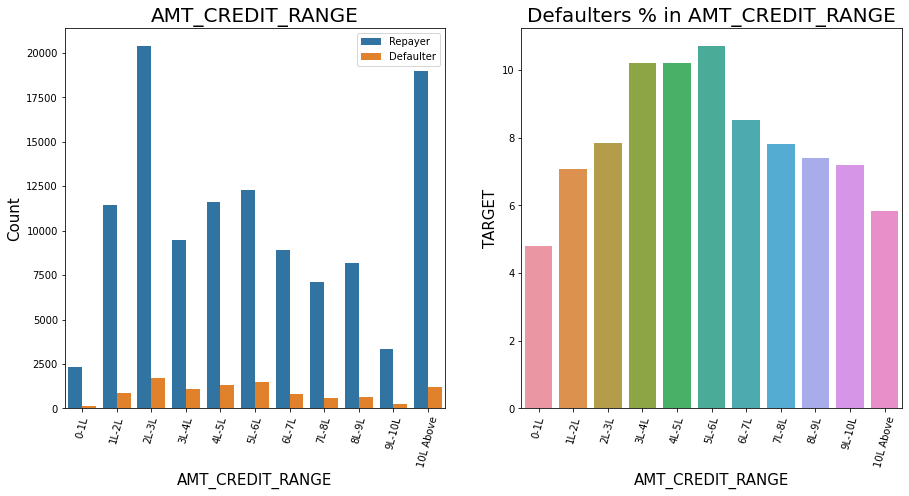

In [123]:
#12 Analyzing Amount_Credit based on loan repayment status

univariate(appl_data,"AMT_CREDIT_RANGE","TARGET",False,True,True)

**Inferences: Loan Amount**
* **there are high number of applicants have loan in range of 2-3 Lakhs followed by 10 Lakh above range**
* **People who get loan for 3-6 Lakhs have most number of defaulters than other loan range.**

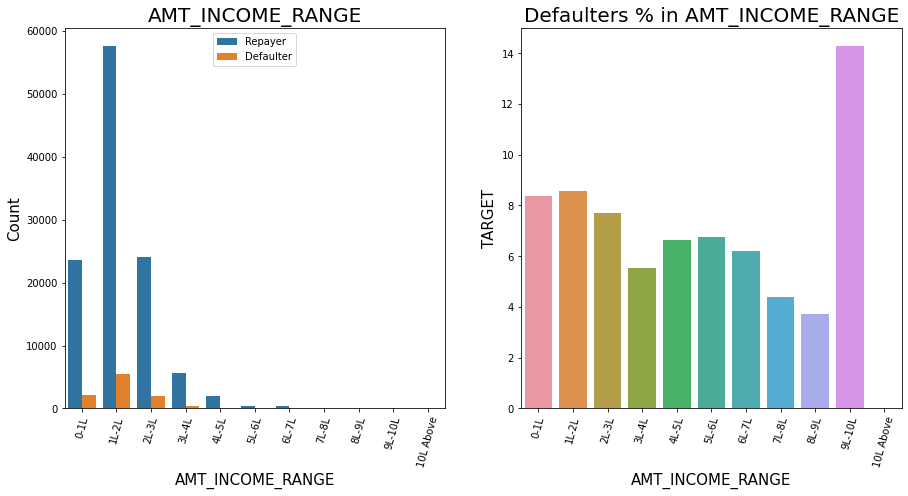

In [124]:
#13  Analyzing Amount_Income Range based on loan repayment status

univariate(appl_data,"AMT_INCOME_RANGE","TARGET",False,True,True)

**Inferences: Applicant Income**
* **Majority of the applications have Income total less than 3 Lakhs.**
* **Application with Income less than 3 Lakhs has high probability of defaulting**
* **Applicant with Income 7-8 Lakhas are less likely to default.**

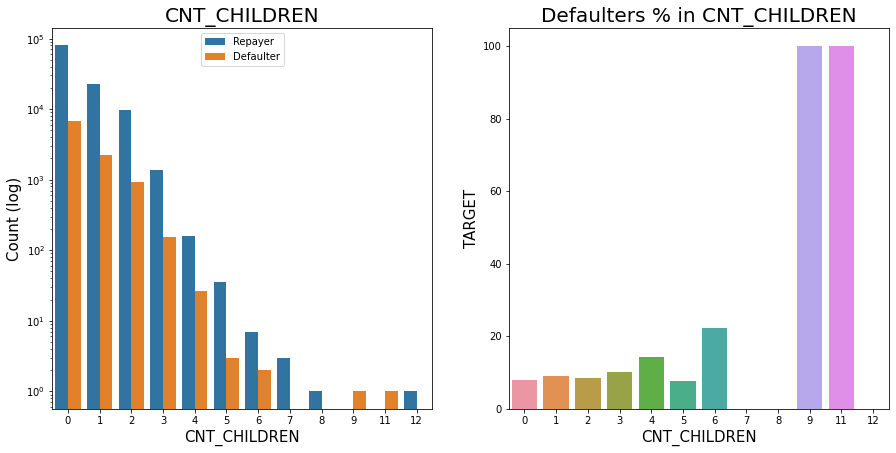

In [125]:
#14  Analyzing Number of children based on loan repayment status

univariate(appl_data,"CNT_CHILDREN","TARGET",True,False,True)

**Inferences: Client Children's Count**
* **Most of the applicants do not have children**
* **Very few clients have more than 3 children.**
* **Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate**

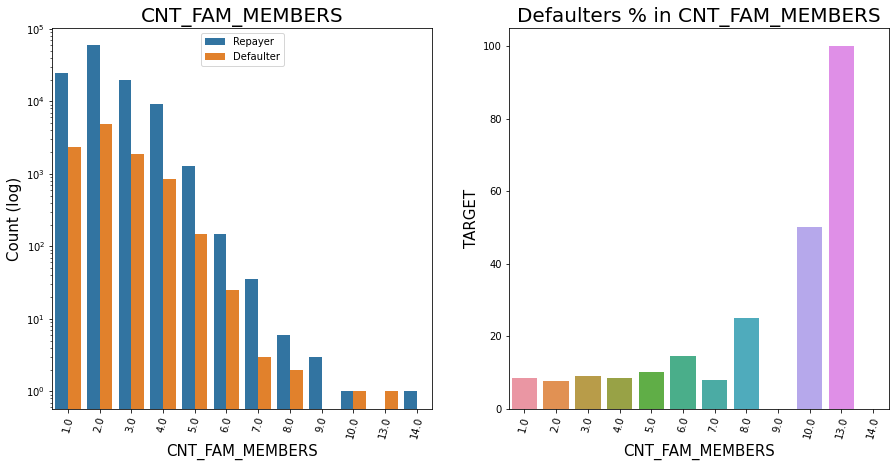

In [126]:
#15 Analyzing Number of family members based on loan repayment status
univariate(appl_data,"CNT_FAM_MEMBERS","TARGET",True,True,True)

**Inferences: Family Memembers Count**
* **Family member follows the same trend as children where having more family members increases the risk of defaulting**

### 6.3.2 Categorical Bivariate or Multivariate Analysis

In [127]:
appl_data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,4.0,10.012500,8.851589,1.8000,5.51250,7.875,12.3750,22.500
Commercial associate,28856.0,2.027872,1.258341,0.2700,1.35000,1.800,2.2500,38.250
Maternity leave,2.0,2.475000,1.590990,1.3500,1.91250,2.475,3.0375,3.600
Pensioner,22285.0,1.359521,0.782581,0.2565,0.90000,1.170,1.6200,22.500
State servant,8710.0,1.792117,0.926382,0.2700,1.12500,1.575,2.2500,13.500
Student,10.0,1.552500,0.495341,0.9000,1.18125,1.575,1.8000,2.250
Unemployed,11.0,1.319318,1.083663,0.3150,0.55125,0.900,2.0250,3.375
Working,64325.0,1.642831,4.704078,0.2565,1.12500,1.350,2.0250,1170.000


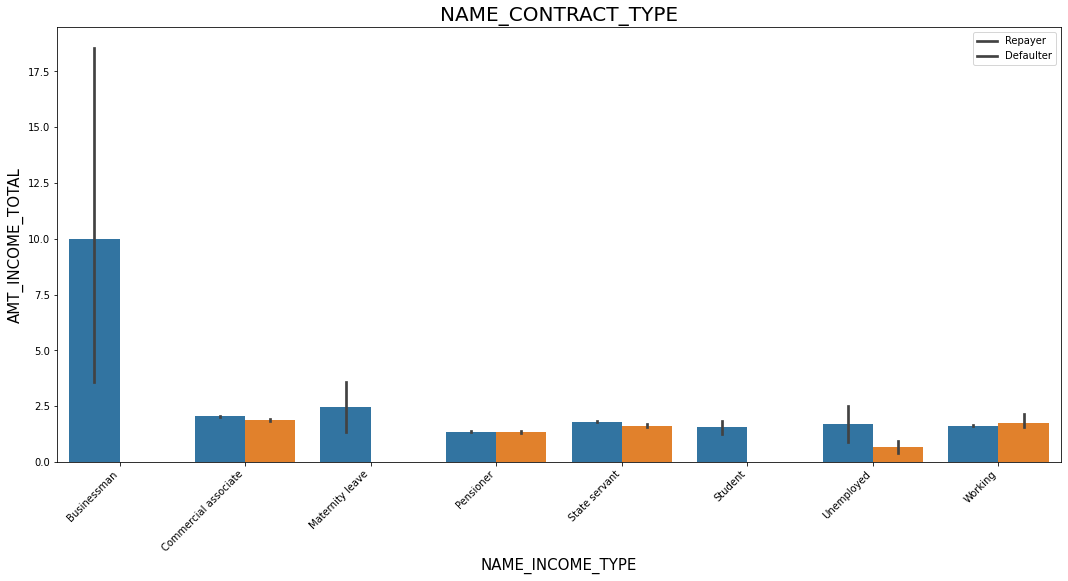

In [128]:
# Income type vs Income Amount Range on a Seaborn Barplot
bivariate_c("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",appl_data,"TARGET",(18,8),['Repayer','Defaulter'])

**Inferences:**
* **It can be seen that Businessman income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a Businessman could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs**

### 6.3.3 Numeric Variables Analysis

**Bisecting the app_data dataframe based on Target value 0 and 1 for correlation and other analysis**

In [129]:
#Listing all the columnns of dataframe "appl_data"
appl_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT

In [130]:
# bisecting the app_data dataframe based on Target value 0 and 1 for correlation and other analysis

cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


# Repayers dataframe
Repayer_df = appl_data.loc[appl_data['TARGET']==0, cols_for_correlation]

# Defaulters dataframe
Defaulter_df = appl_data.loc[appl_data['TARGET']==1, cols_for_correlation]

In [131]:
len(cols_for_correlation)

41

**Correlation between numeric variable**

In [132]:
# Getting  top 10 correlation for the Repayers dataframe

corr_repayer = Repayer_df.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
64,AMT_GOODS_PRICE,AMT_CREDIT,0.987270
65,AMT_GOODS_PRICE,AMT_ANNUITY,0.778504
43,AMT_ANNUITY,AMT_CREDIT,0.773111
131,DAYS_EMPLOYED,DAYS_BIRTH,0.625494
42,AMT_ANNUITY,AMT_INCOME_TOTAL,0.450291
63,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.376346
21,AMT_CREDIT,AMT_INCOME_TOTAL,0.368764
152,DAYS_REGISTRATION,DAYS_BIRTH,0.332138
351,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,0.278442
174,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.274320


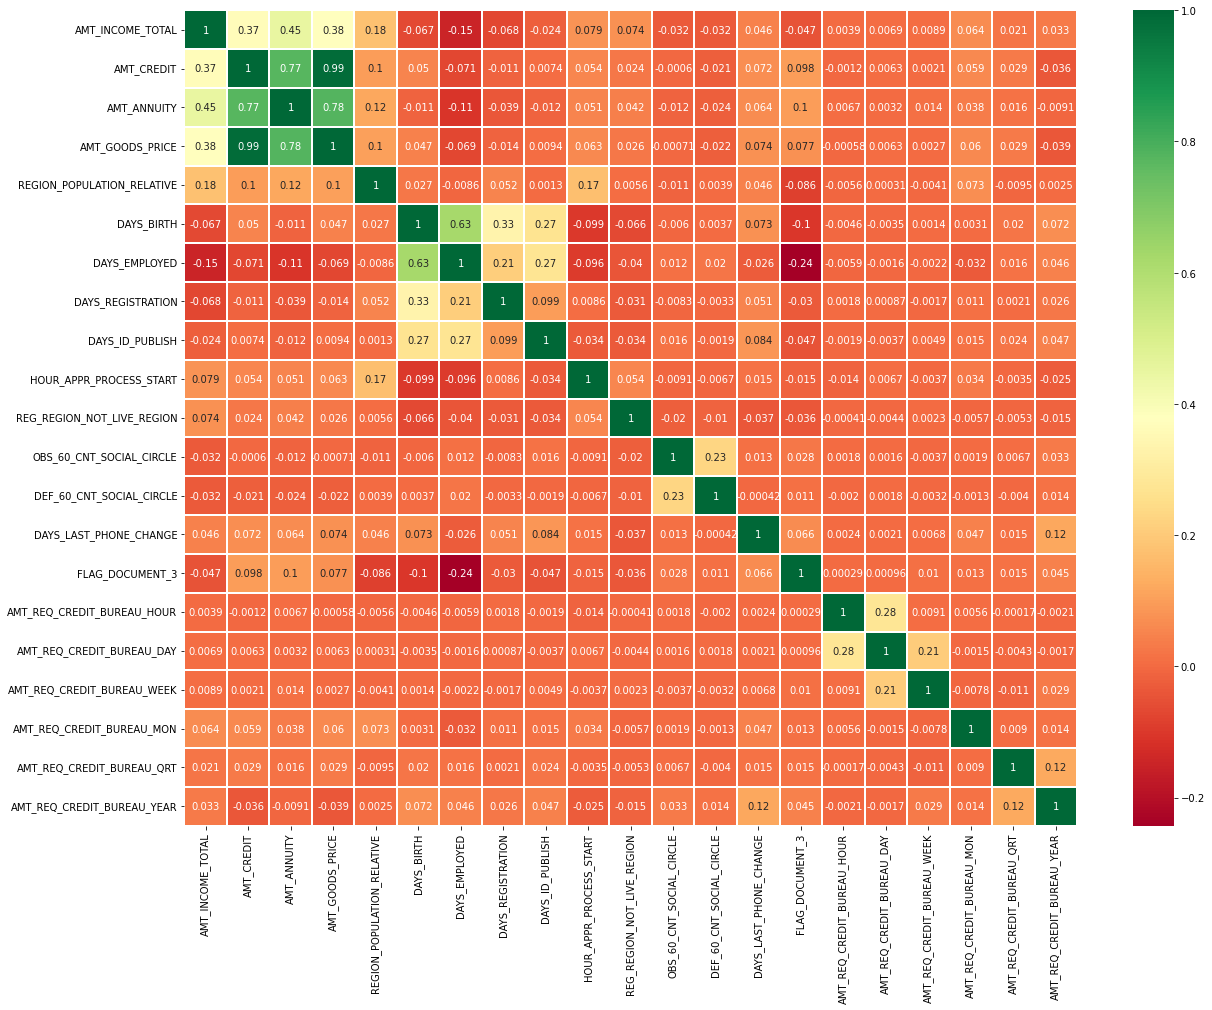

In [133]:
#plotting heatmap to see linear correlation amoung Repayers 

fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

**Inferences:**
**Correlating factors amongst repayers**

**1. Credit amount is highly correlated with:**
* **Goods Price Amount**
* **Loan Annuity**
* **Total Income**

**2. We can also see that repayers have high correlation in number of days employed.**

In [134]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
64,AMT_GOODS_PRICE,AMT_CREDIT,0.982621
43,AMT_ANNUITY,AMT_CREDIT,0.750197
65,AMT_GOODS_PRICE,AMT_ANNUITY,0.749368
131,DAYS_EMPLOYED,DAYS_BIRTH,0.583165
351,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,0.319448
152,DAYS_REGISTRATION,DAYS_BIRTH,0.289709
300,FLAG_DOCUMENT_3,DAYS_EMPLOYED,0.272398
263,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.262987
173,DAYS_ID_PUBLISH,DAYS_BIRTH,0.249524
174,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.231427


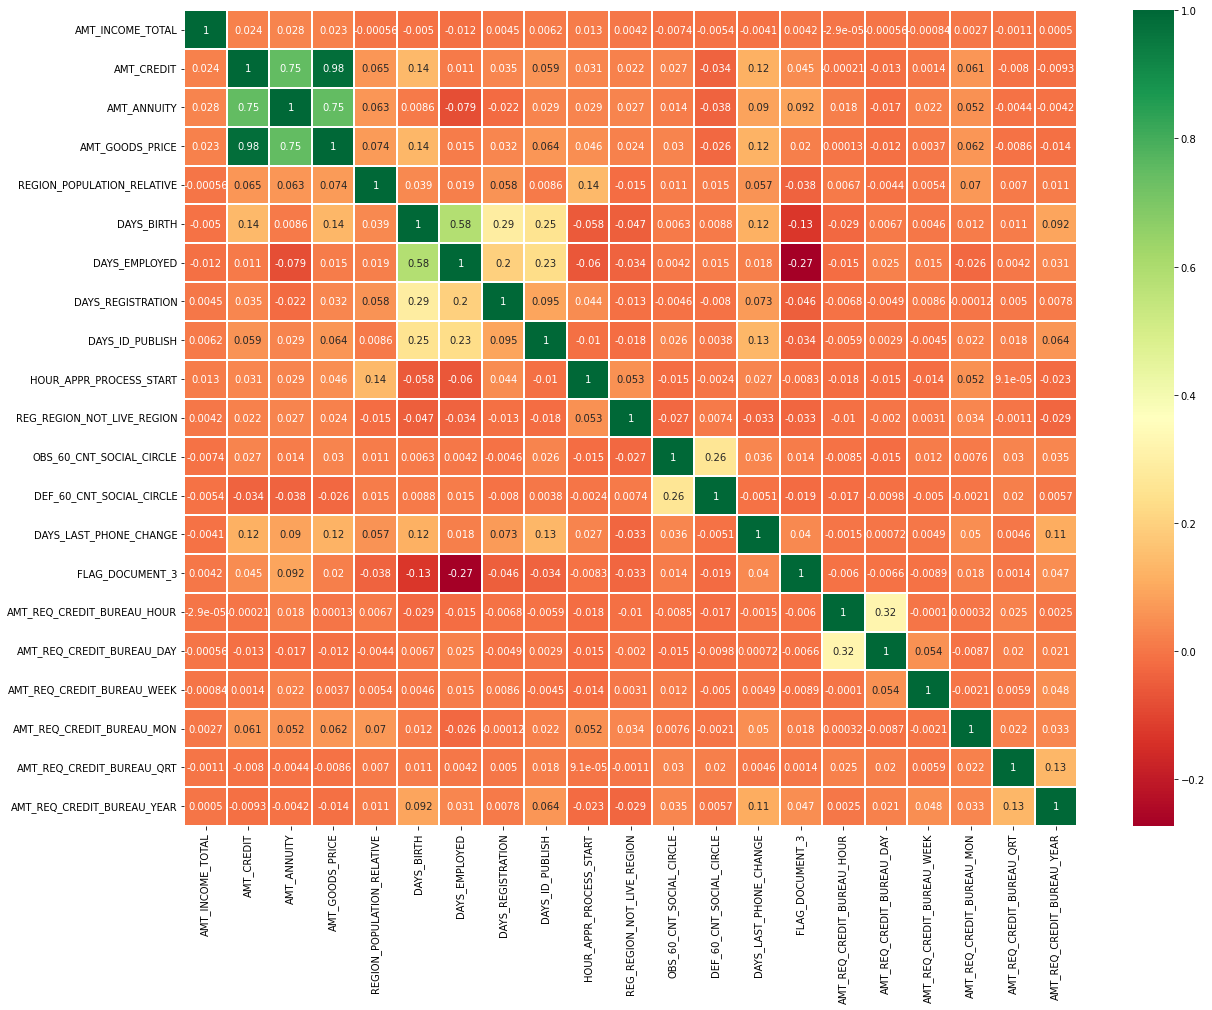

In [135]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

**Inferences: Correlating factors amongst repayers**
* **Credit amount is highly correlated with good price amount which is same as repayers.**
* **Loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)**
* **We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).**
* **There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.**
* **Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.**
* **There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)**

### 6.3.4 Numerical Univariate Analysis

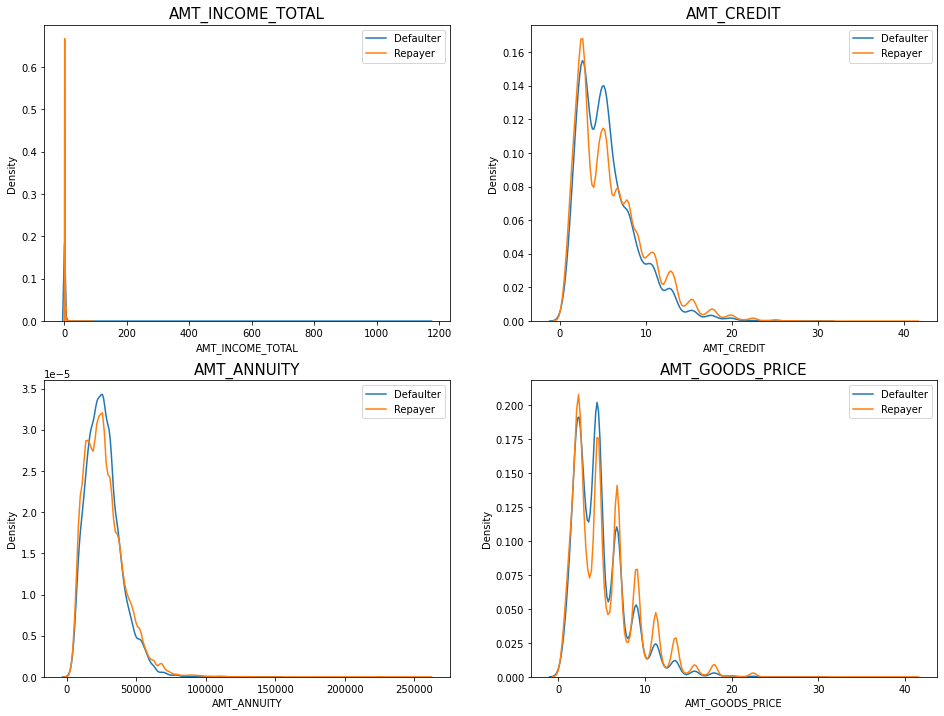

In [136]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = appl_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False,label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5})
    plt.legend()


plt.show()

**Inferences:**
* **Most no of loans are given for goods price below 10 lakhs**
* **Most people pay annuity below 50K for the credit loan**
* **Credit amount of the loan is mostly less then 10 lakhs**
* **The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision**

### 6.3.5 Numerical Bivariate Analysis

<Figure size 1080x1080 with 0 Axes>

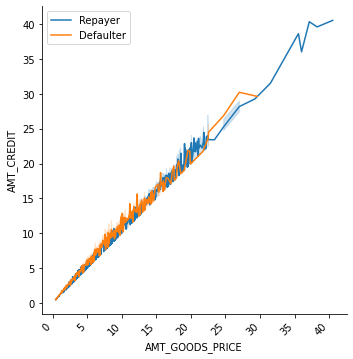

In [137]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_n('AMT_GOODS_PRICE','AMT_CREDIT',appl_data,"TARGET", "line",['Repayer','Defaulter'])

**Inferences:**
* **When the credit amount goes beyond 30 Lakhs, there is an increase in defaulters.**

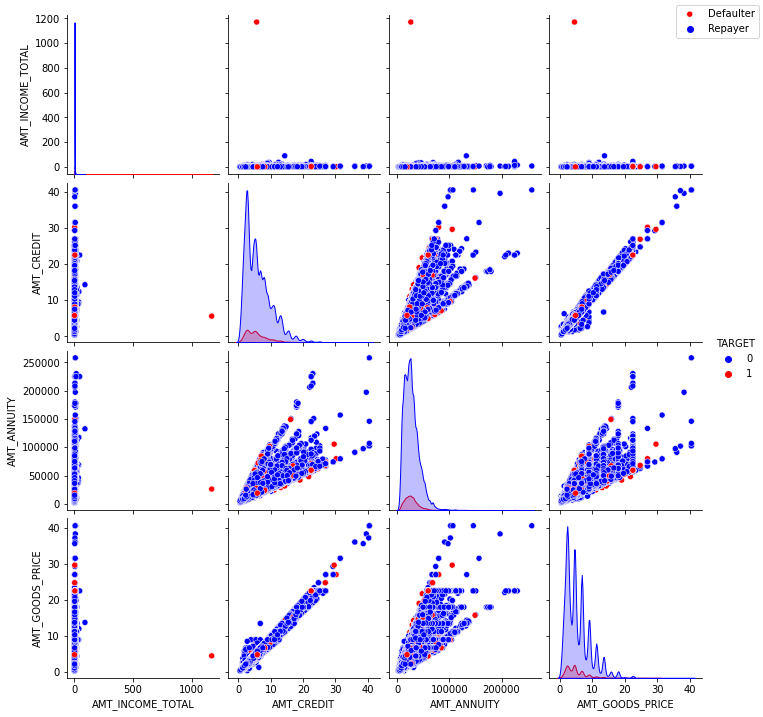

In [138]:
# Plotting pairplot between amount variable to draw reference against loan repayment status

amount = appl_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]

ax= sns.pairplot(amount,hue="TARGET",palette=["b","r"])
ax.fig.legend(labels=['Defaulter','Repayer'])
plt.show()

**Inferences:**
* **When Annuity Amount > 15K and Good Price Amount > 20 Lakhs, there is a lesser chance of defaulters**
* **Loan Amount(AMT_CREDIT) and Goods price(AMT_GOODS_PRICE) are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line**
* **There are very less defaulters for AMT_CREDIT >20 Lakhs**

## 7. Merged Dataframes Analysis

In [139]:
# merge both the dataframe on SK_ID_CURR with Inner Joins
loan_df = pd.merge(appl_data, prev_appl, how='inner', on='SK_ID_CURR')
loan_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYEMENT_YEARS,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,YEARLY_DECISION
0,100006,0,Cash loans,F,Y,0,1.350,3.126825,29686.5,2.970,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,Laborers,2.0,2.0,2.0,WEDNESDAY,17.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,2.0,0.0,2.0,0.0,617.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1L-2L,3L-4L,2L-3L,52.068493,50-55,8.326027,5-10,2078043,Cash loans,24246.000,675000.0,675000.0,675000.0,XNA,Approved,181.0,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,151.0,1259.0,151.0,143.0,0.0,1
1,100007,0,Cash loans,M,Y,0,1.215,5.130000,21865.5,5.130,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,Core staff,1.0,2.0,2.0,THURSDAY,11.0,0.0,0.0,0.0,0.0,1.0,1.0,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1L-2L,5L-6L,5L-6L,54.608219,50-55,8.323288,5-10,2001242,Cash loans,16509.600,180000.0,180000.0,180000.0,XNA,Approved,865.0,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,walk-in,Regional / Local,1200.0,Consumer electronics,18.0,high,Cash Street: high,365243.0,834.0,324.0,354.0,347.0,0.0,3
2,100007,0,Cash loans,M,Y,0,1.215,5.130000,21865.5,5.130,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,Core staff,1.0,2.0,2.0,THURSDAY,11.0,0.0,0.0,0.0,0.0,1.0,1.0,Religion,0.0,0.0,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1L-2L,5L-6L,5L-6L,54.608219,50-55,8.323288,5-10,2730157,Cash loans,13010.985,225000.0,284400.0,225000.0,XNA,Approved,867.0,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),4.0,XNA,48.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN,3
3,100009,0,Cash loans,F,Y,1,1.710,15.607260,41301.0,13.950,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213.0,619,1,Accountants,3.0,2.0,2.0,SUNDAY,16.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,1.0,0.0,1.0,0.0,1562.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1L-2L,10L Above,10L Above,37.747945,35-40,8.575342,5-10,1413109,Consumer loans,8996.760,98239.5,98239.5,98239.5,XAP,Approved,449.0,Cash through the bank,XAP,Unknown,Repeater,Consumer Electronics,POS,XNA,Regional / Local,164.0,Consumer electronics,12.0,low_action,POS household without interest,365243.0,418.0,88.0,88.0,84.0,0.0,2
4,100011,0,Cash loans,F,Y,0,1.125,10.196100,33826

In [140]:
#Checking the details of the merged dataframe
loan_df.shape

(96826, 82)

In [141]:
# checking the columns and column types of the dataframe
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96826 entries, 0 to 96825
Data columns (total 82 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   96826 non-null  int64   
 1   TARGET                       96826 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         96826 non-null  category
 3   CODE_GENDER                  96826 non-null  category
 4   FLAG_OWN_REALTY              96826 non-null  category
 5   CNT_CHILDREN                 96826 non-null  category
 6   AMT_INCOME_TOTAL             96826 non-null  float64 
 7   AMT_CREDIT_x                 96826 non-null  float64 
 8   AMT_ANNUITY_x                96813 non-null  float64 
 9   AMT_GOODS_PRICE_x            96754 non-null  float64 
 10  NAME_TYPE_SUITE_x            96612 non-null  category
 11  NAME_INCOME_TYPE             96826 non-null  category
 12  NAME_EDUCATION_TYPE          96826 non-null  category
 13  N

In [142]:
# Bisecting the "loan_df" dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_df[loan_df['TARGET']==0] # Repayers
L1 = loan_df[loan_df['TARGET']==1] # Defaulters

**Plotting Contract Status vs purpose of the loan**

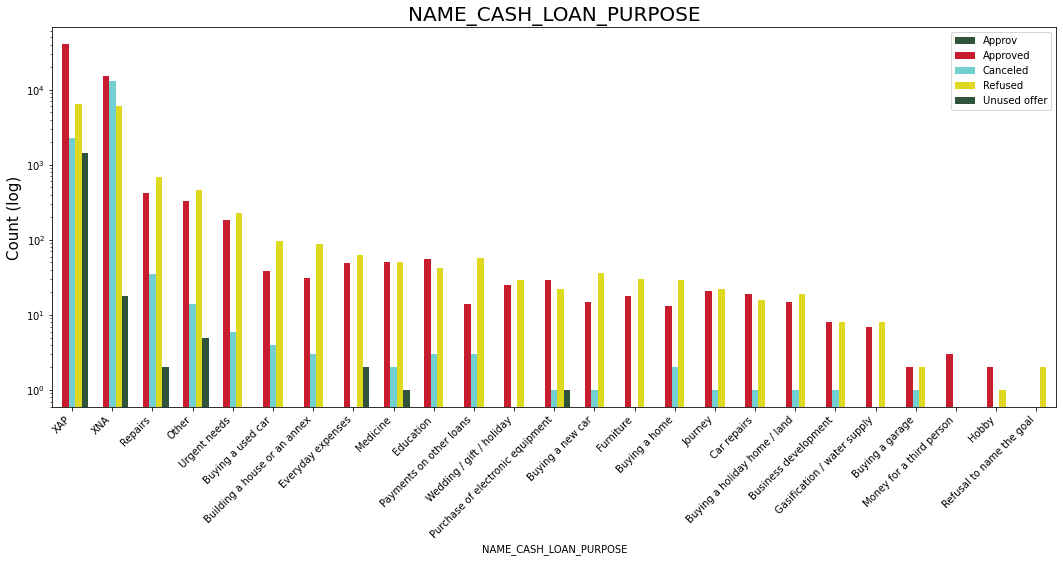

In [143]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))


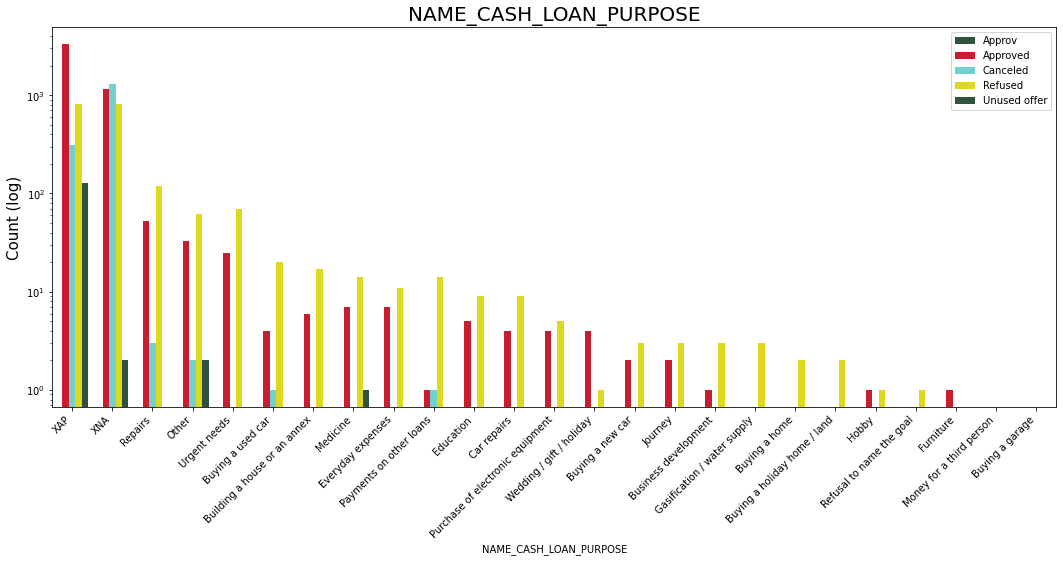

In [144]:
univariate_c_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#295939","#e40017","#64dfdf","#fff600"],True,(18,7))

**Inferences:**
* **Loan purpose has high number of unknown values (XAP, XNA)**
* **Loan taken for the purpose of Repairs looks to have highest default rate**
* **Huge number application have been rejected by bank or refused by client which are applied for Repair or Other. from this we can infer that repair is considered high risk by bank. Also, either they are rejected or bank offers loan on high interest rate which is not feasible by the clients and they refuse the loan.**

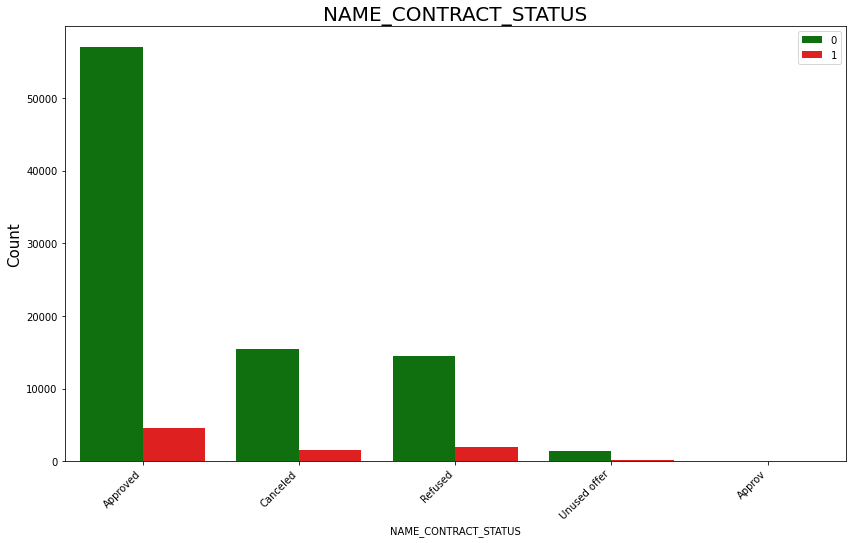

ValueError: ignored

In [145]:
# Checking Contract Status based on loan repayment status whether there is any business loss or financial loss

univariate_c_merged("NAME_CONTRACT_STATUS",loan_df,"TARGET",['g','r'],False,(14,8))
r = loan_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([r.value_counts(),round(r.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
df1

**Inferences:**
* **90% of the previously cancelled client have actually repayed the loan. Revising the interest rates would increase business opportunity for these clients**
* **88% of the clients who have been previously refused a loan has payed back the loan in current case.**
* **Refusal reason should be recorded for further analysis as these clients could turn into potential repaying customer.**

In [ ]:
# plotting the relationship between income total and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

**Inferences:**
* **The point plot show that the people who have not used offer earlier have defaulted even when there average income is higher than others**

In [ ]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

**Inferences:**
* **Clients who have average of 0.13 or higher their DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and thus analysing client's social circle could help in disbursment of the loan.**

## 7. Conclusions

### After analysing the datasets, there are few attributes of a client with which the bank would be able to identify if they will repay the loan or not. The analysis is consised as below with the contributing factors and categorization:

### A. Decisive Factor whether an applicant will be Repayer:
1. **NAME_EDUCATION_TYPE: Academic degree has less defaults.**
2. **NAME_INCOME_TYPE: Student and Businessmen have no defaults.**
3. **REGION_RATING_CLIENT: RATING 1 is safer.**
4. **ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%**
5. **DAYS_BIRTH: People above age of 50 have low probability of defaulting**
6. **DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate**
7. **AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default**
8. **NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.**
9. **CNT_CHILDREN: People with zero to two children tend to repay the loans.**

### B. Decisive Factor whether an applicant will be Defaulter:
1. **CODE_GENDER: Men are at relatively higher default rate**
2. **NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.**
3. **NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education**
4. **NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.**
5. **REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.**
6. **OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as their default rate is huge.**
7. **ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.**
8. **DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting**
9. **DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.**
10. **CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected.**
11. **AMT_GOODS_PRICE: When the credit amount goes beyond 3lakhs, there is an increase in defaulters.**

### C. Factors that Loan can be given on Condition of High Interest rate to mitigate any default risk leading to business loss:


1. **NAME_HOUSING_TYPE: High number of loan applications are from the category of people who live in Rented apartments & living with parents and hence offering the loan would mitigate the loss if any of those default.**
2. **AMT_CREDIT: People who get loan for 3-6 Lakhs tend to default more than others and hence having higher interest specifically for this credit range would be ideal.**
3. **AMT_INCOME: Since 90% of the applications have Income total less than 3Lakhs and they have high probability of defaulting, they could be offered loan with higher interest compared to other income category.**
4. **CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have 4 to 8 children has a very high default rate and hence higher interest should be imposed on their loans.**
5. **NAME_CASH_LOAN_PURPOSE: Loan taken for the purpose of Repairs seems to have highest default rate. A very high number applications have been rejected by bank or refused by client in previous applications as well which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected, or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan. The same approach could be followed in future as well.**

### D. Suggestions:
* **90% of the previously cancelled client have actually repayed the loan. Record the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.**
* **88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.**